In [1]:
import sys
import os
current_dir = os.getcwd()

import math
import sys, subprocess, os, time
import numpy as np

import maskLib.MaskLib as m
import maskLib.microwaveLib as mw
import maskLib.fluxoniumLib as fl
from maskLib.markerLib import AlphaNumStr

# from Resonator_parse_test import ResonatorChip

# needed for ability to change maskLib stuff and have it reload
%load_ext autoreload
%autoreload 2

# Test Chip 0: SEM: dose array for JJ and JJ array
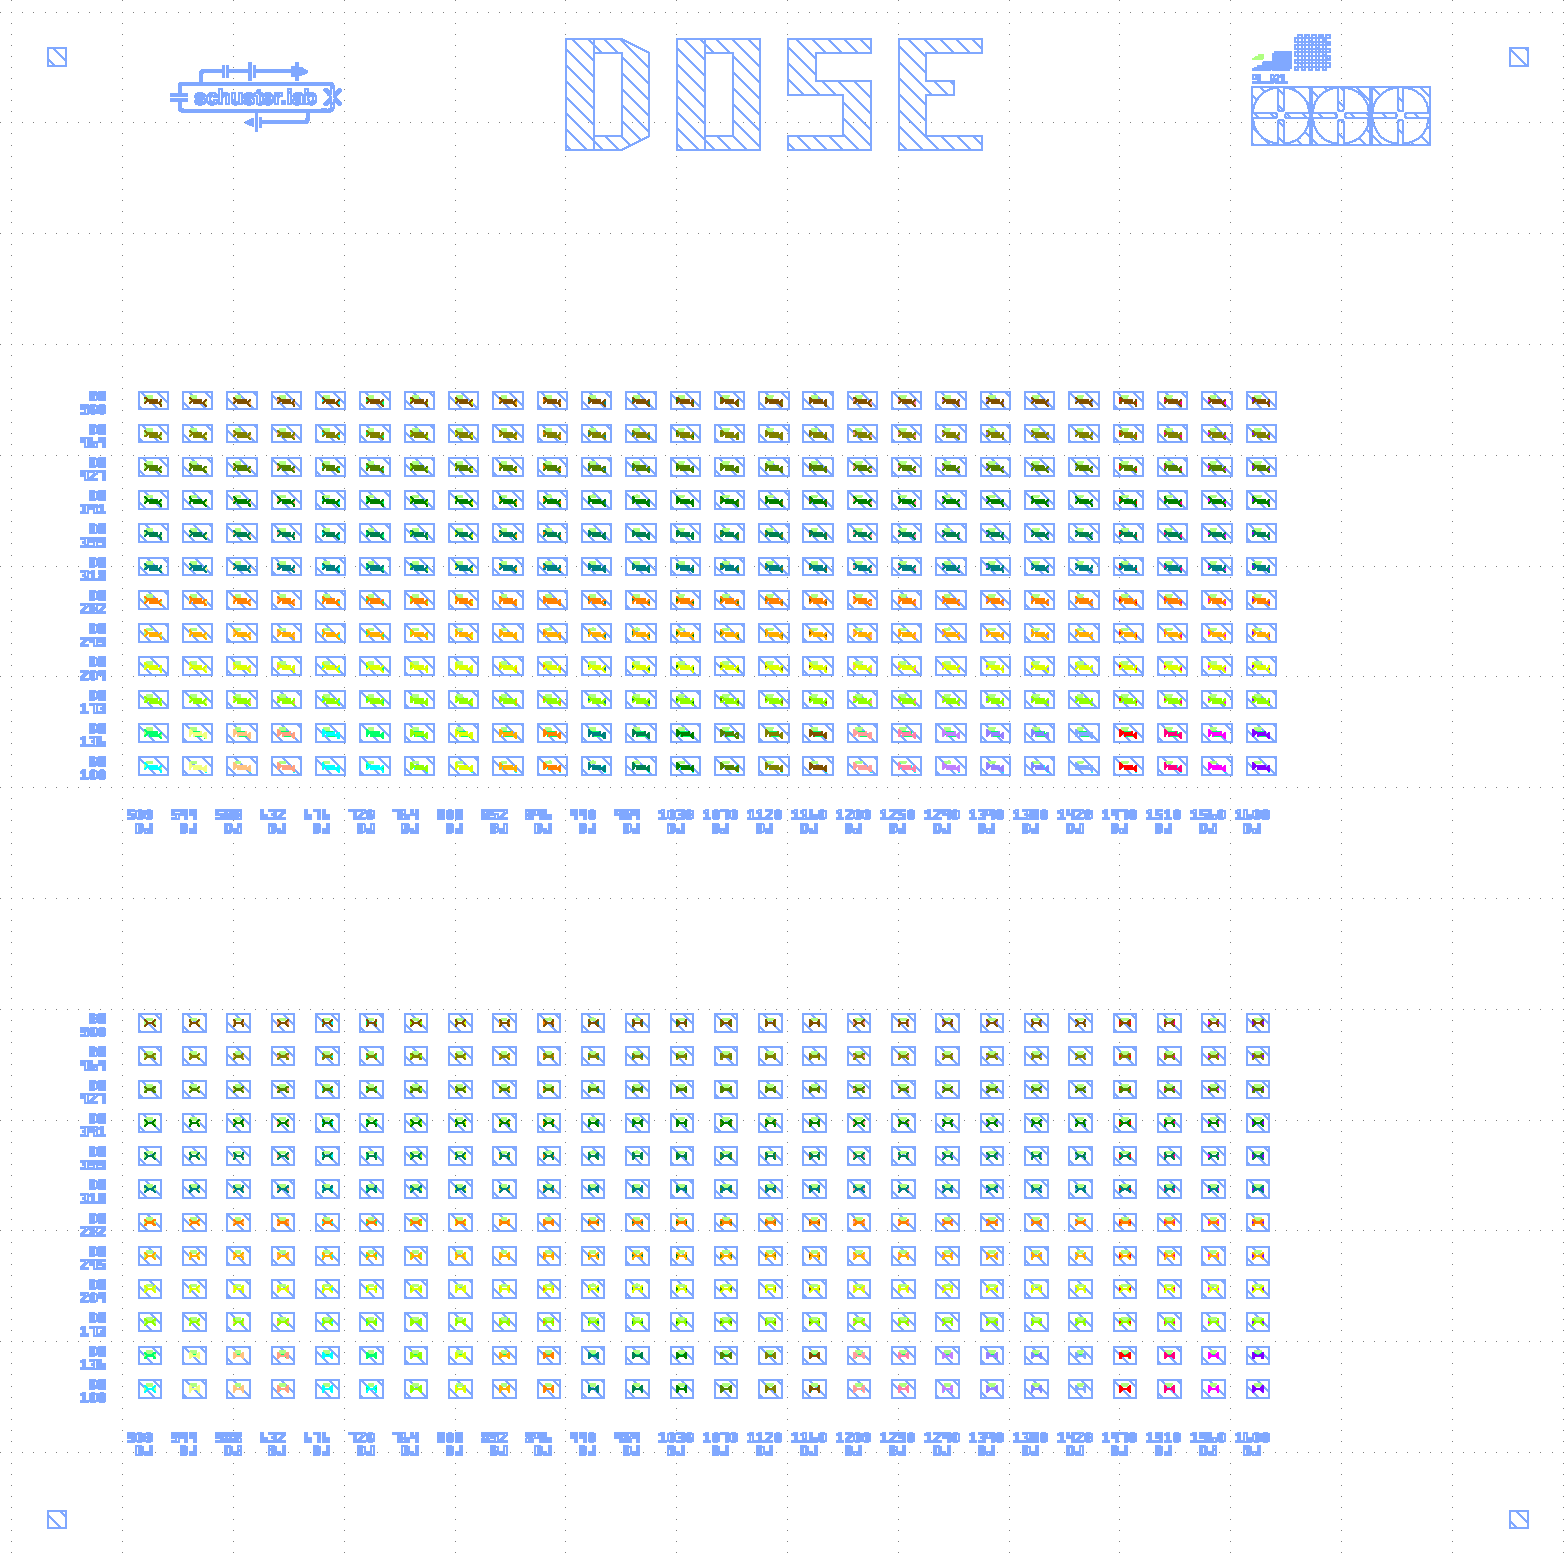

# Test Chip 1: Probeable dose array for JJ array
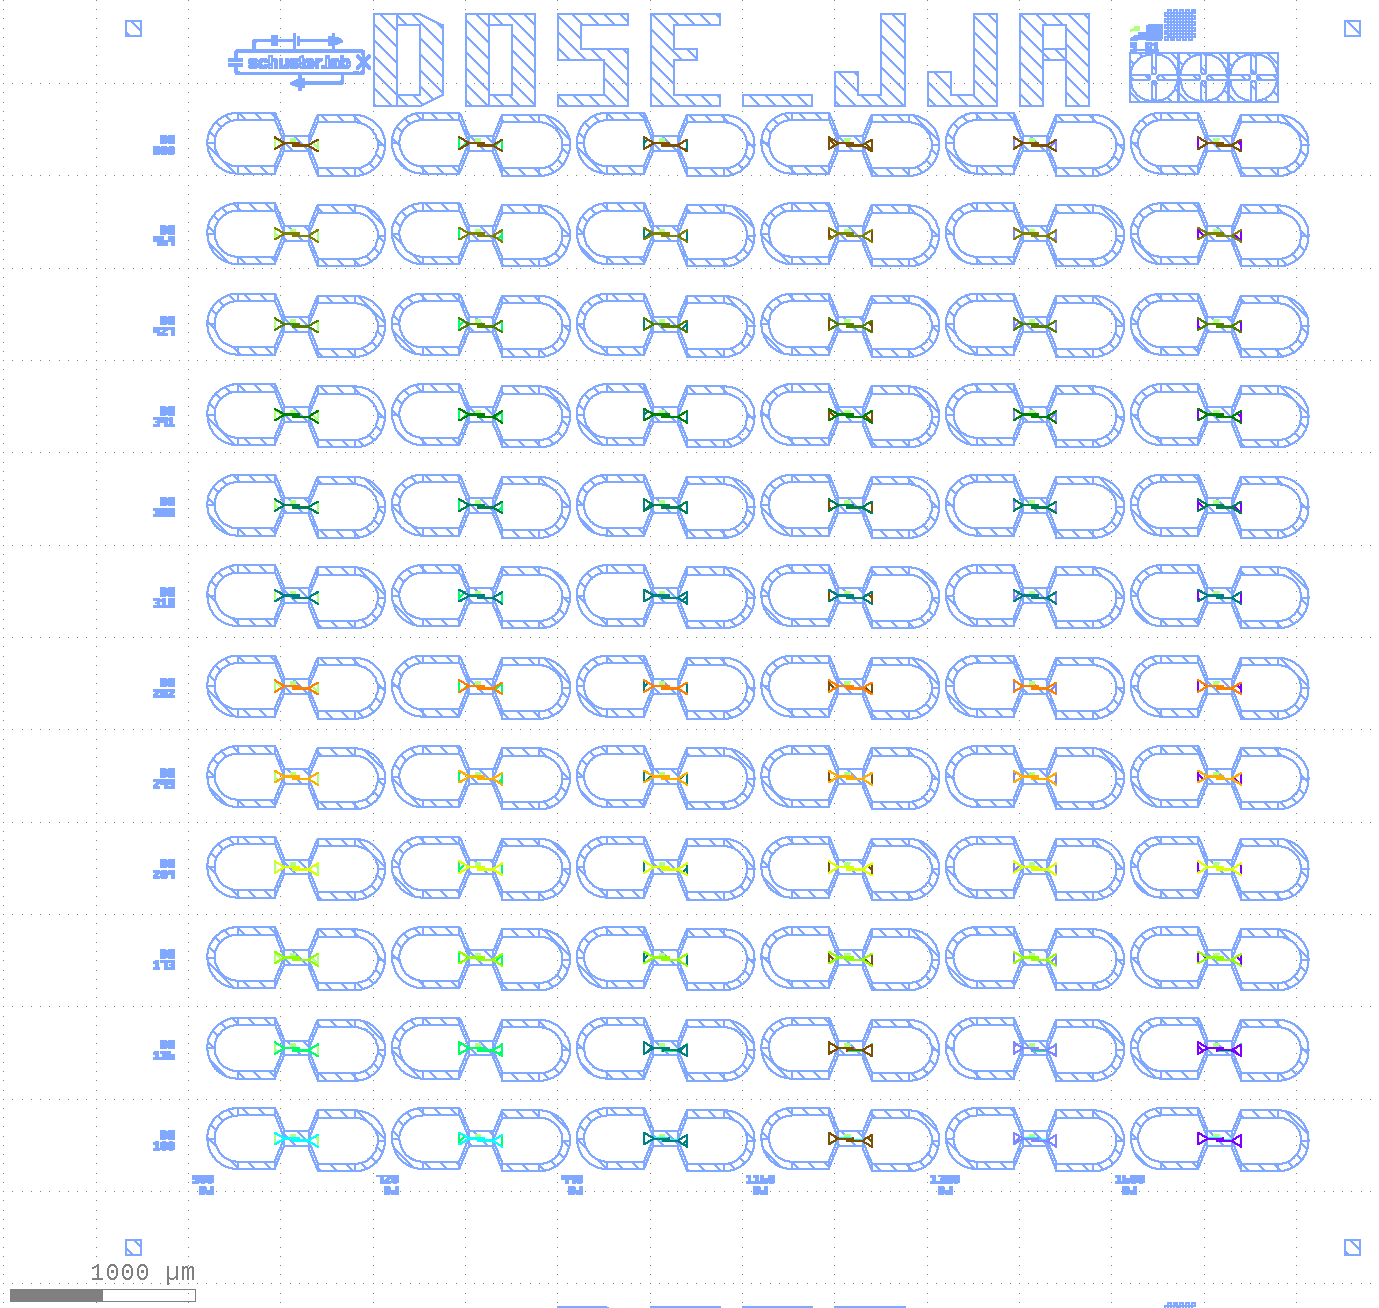

# Test Chip 2: Probeable dose array for JJ
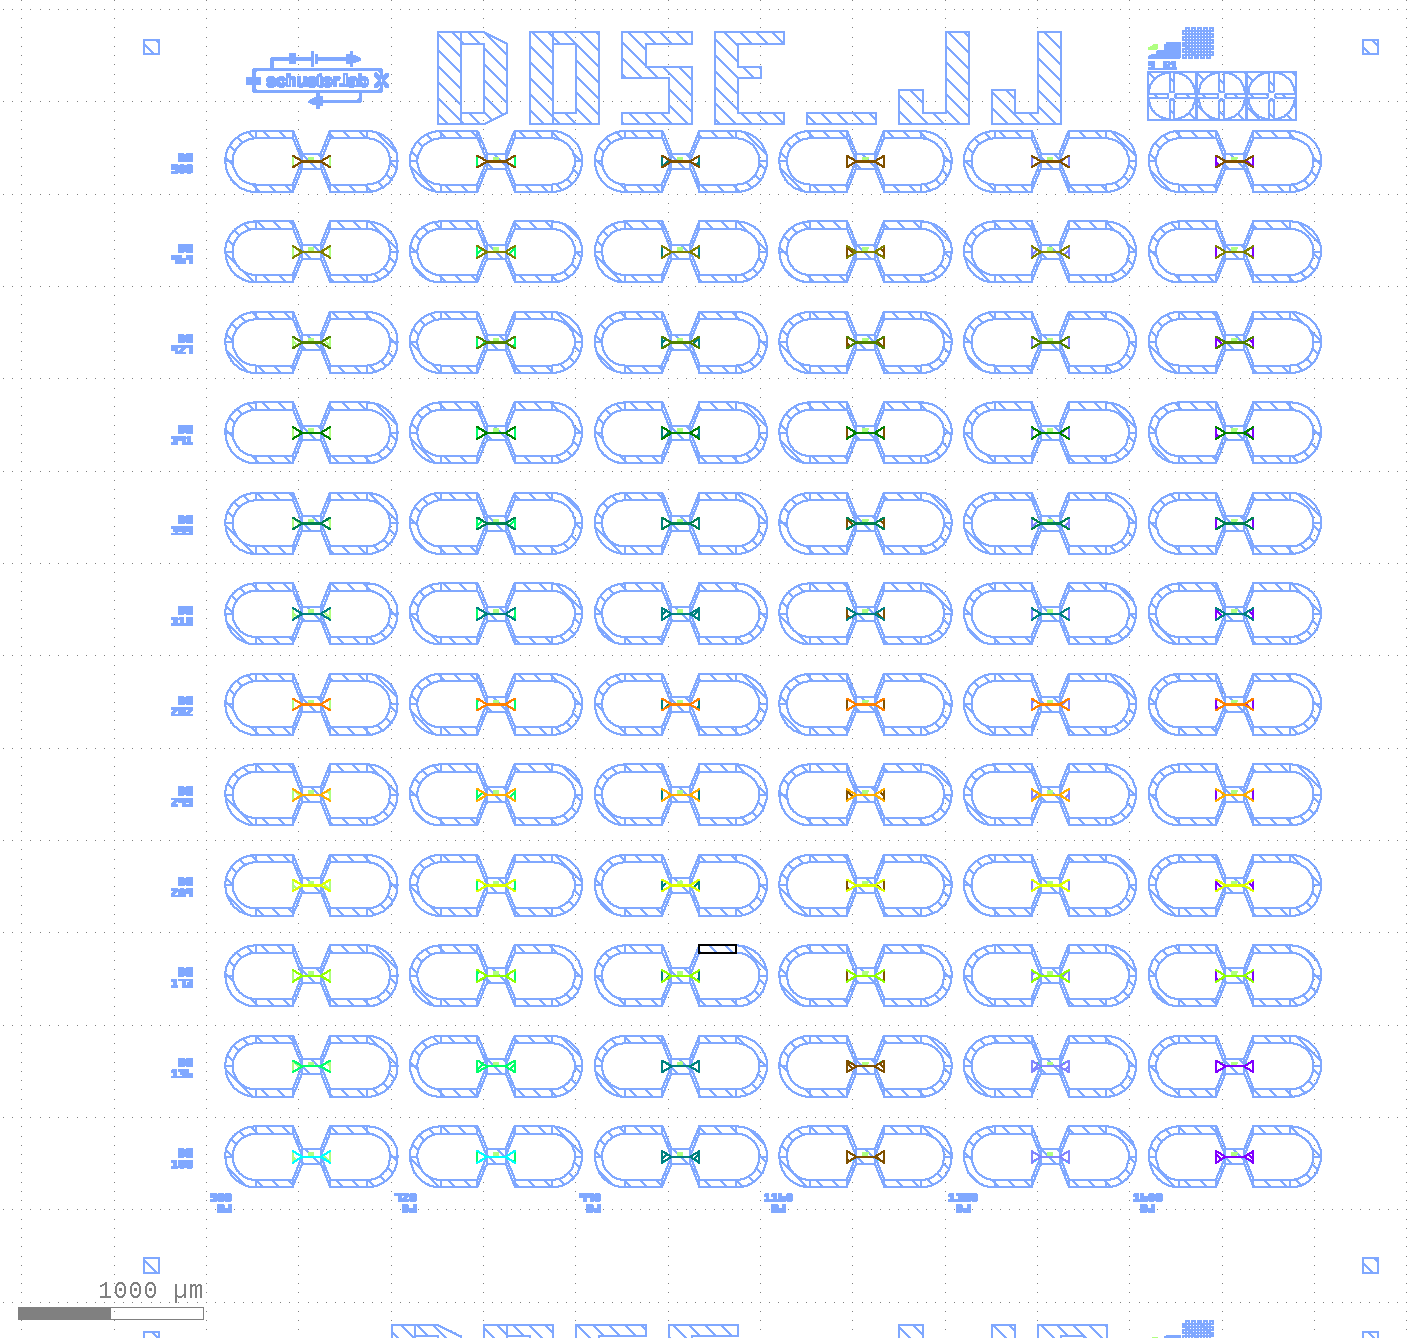

# Test Chip 3: SEM: bridge len vs width for JJ array
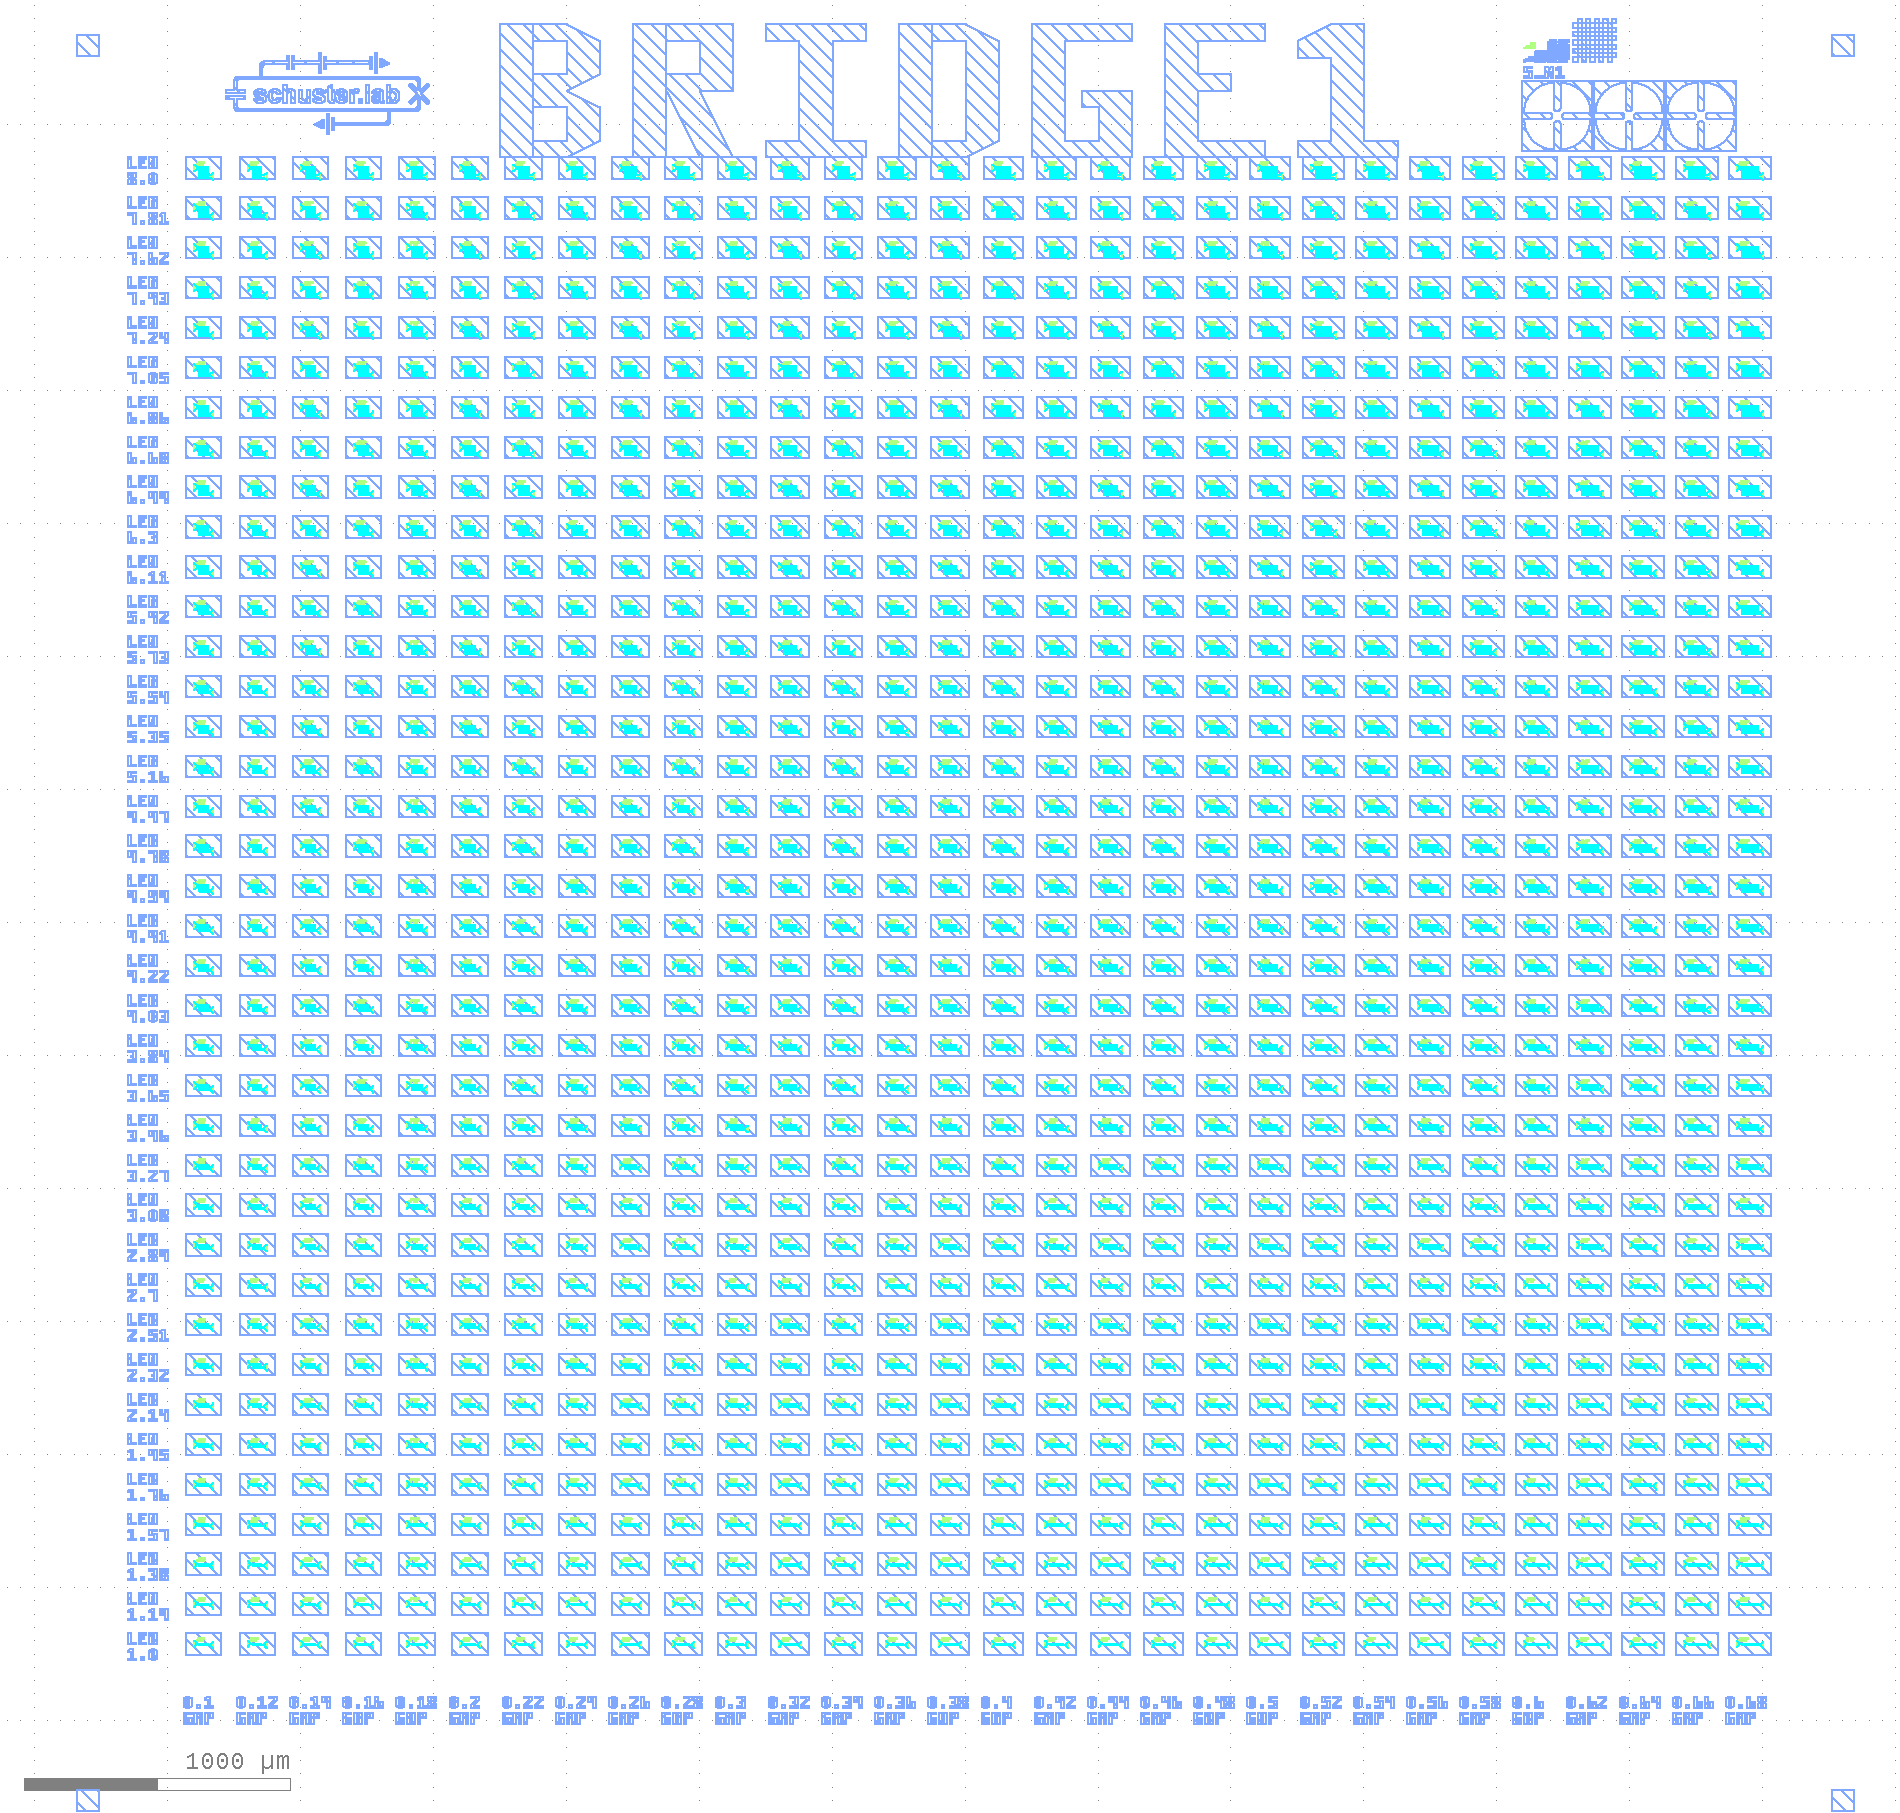

# Test Chip 4: Probeable bridge len vs width for JJ array
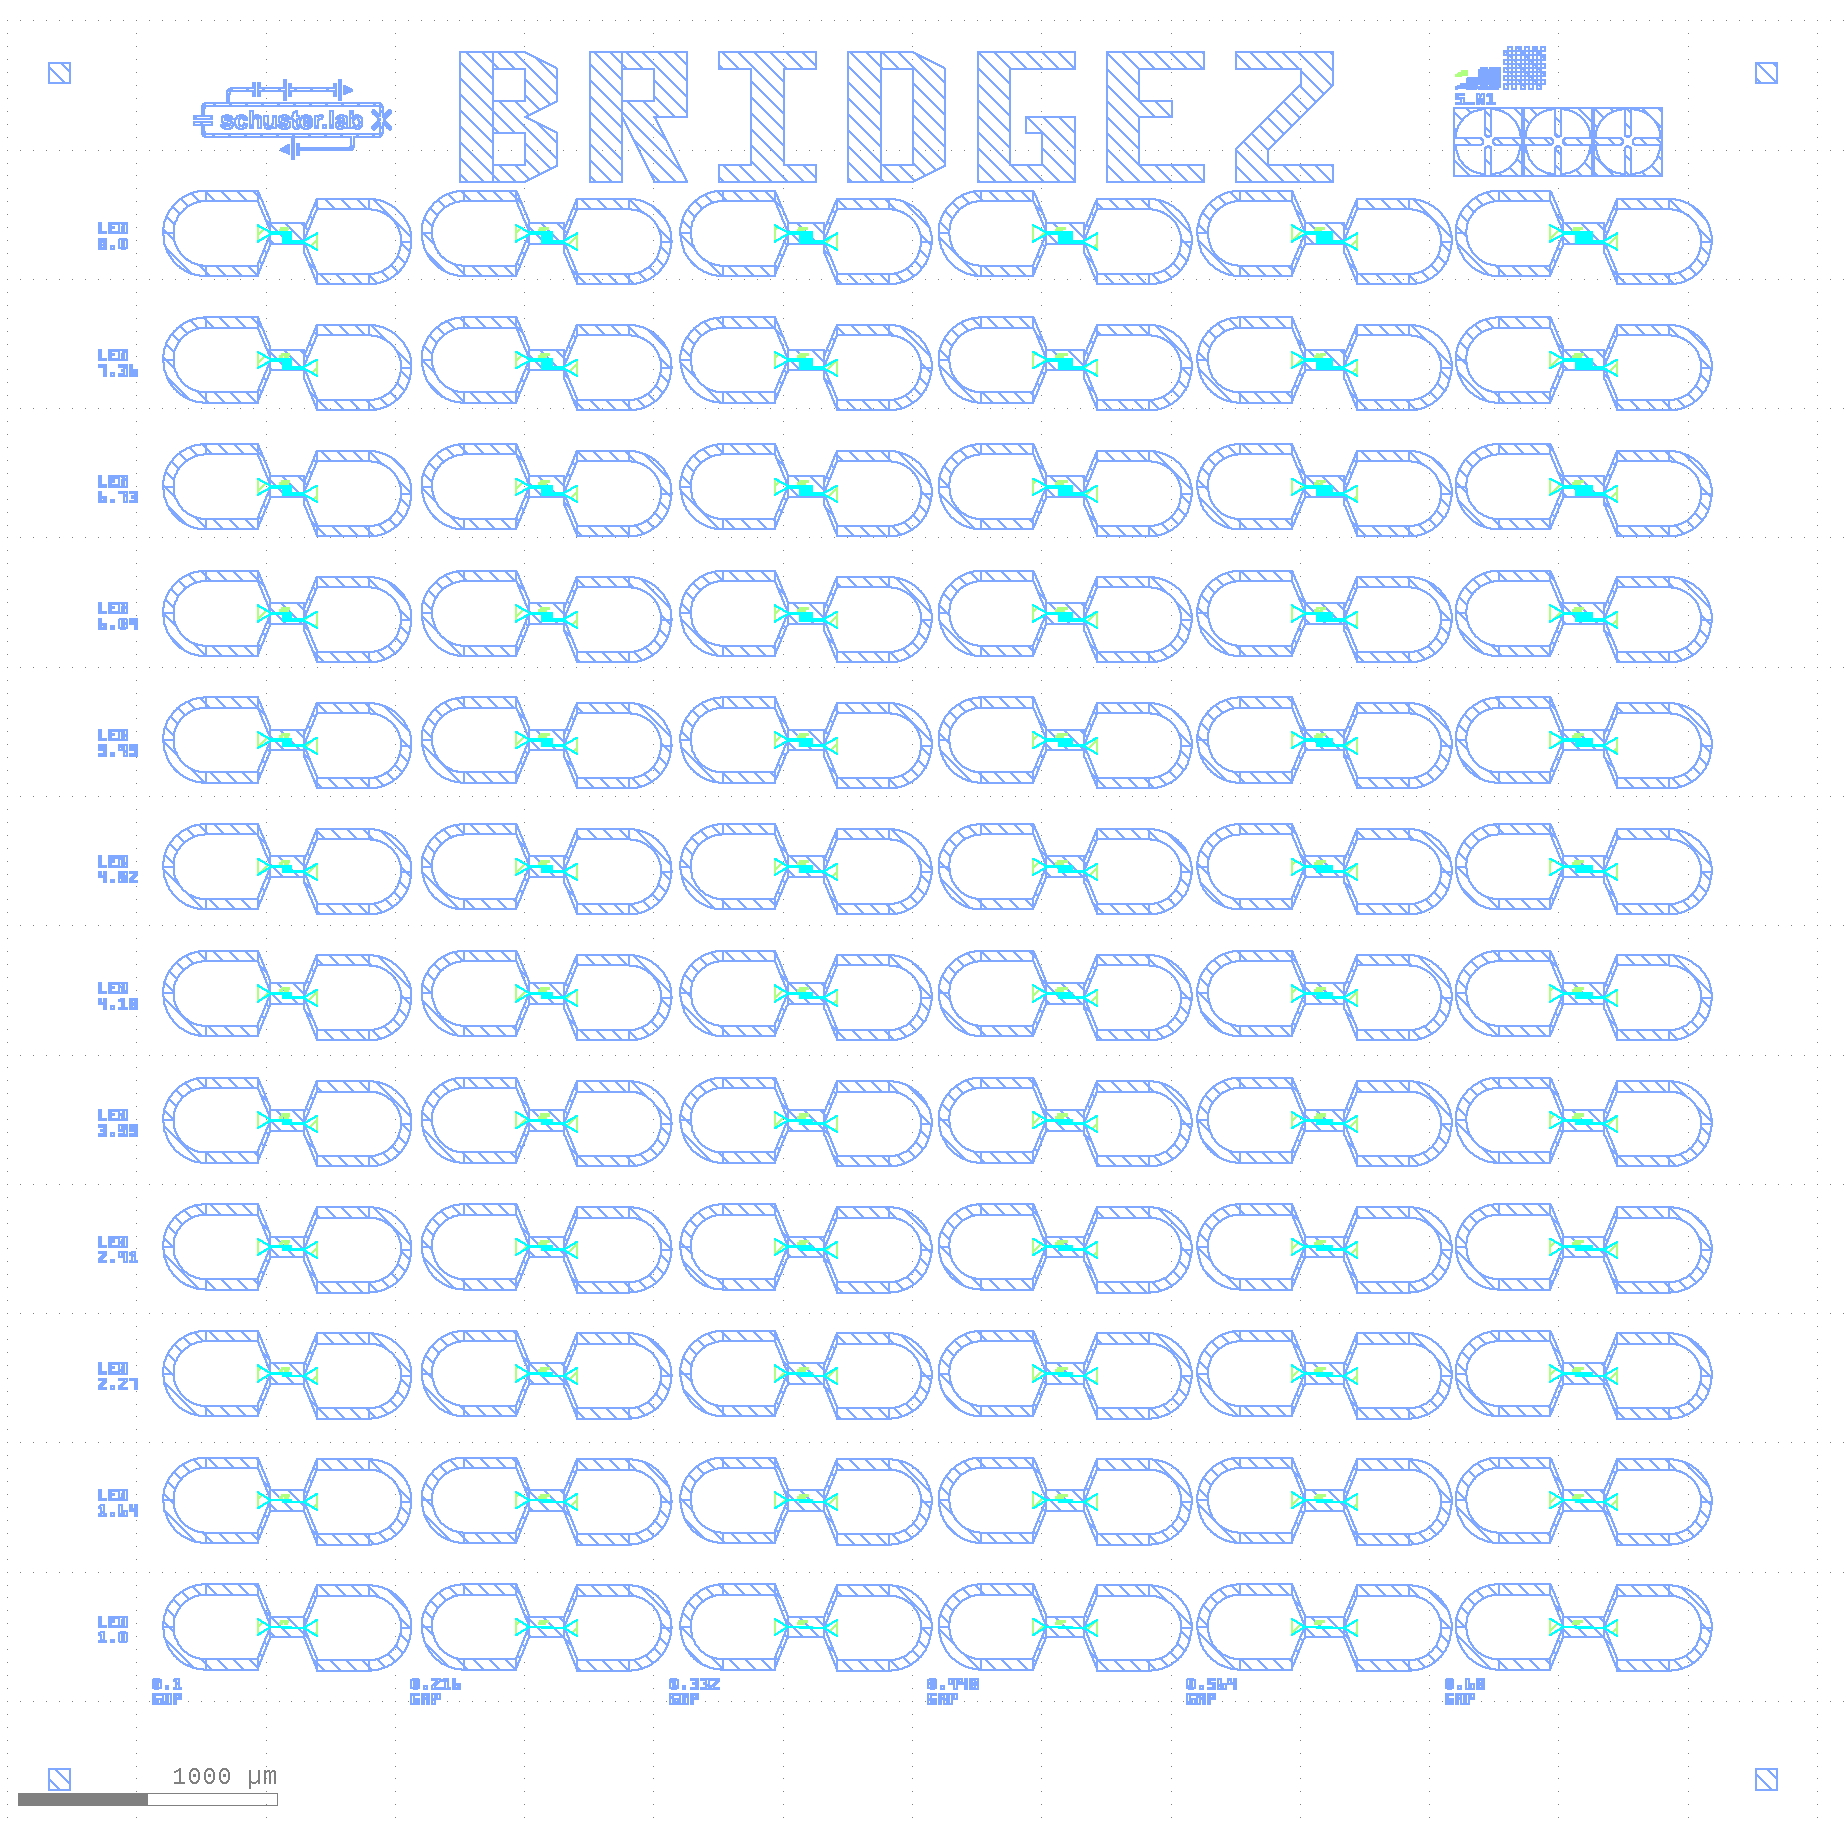

# Test Chip 5: SEM: window size vs width for JJ array
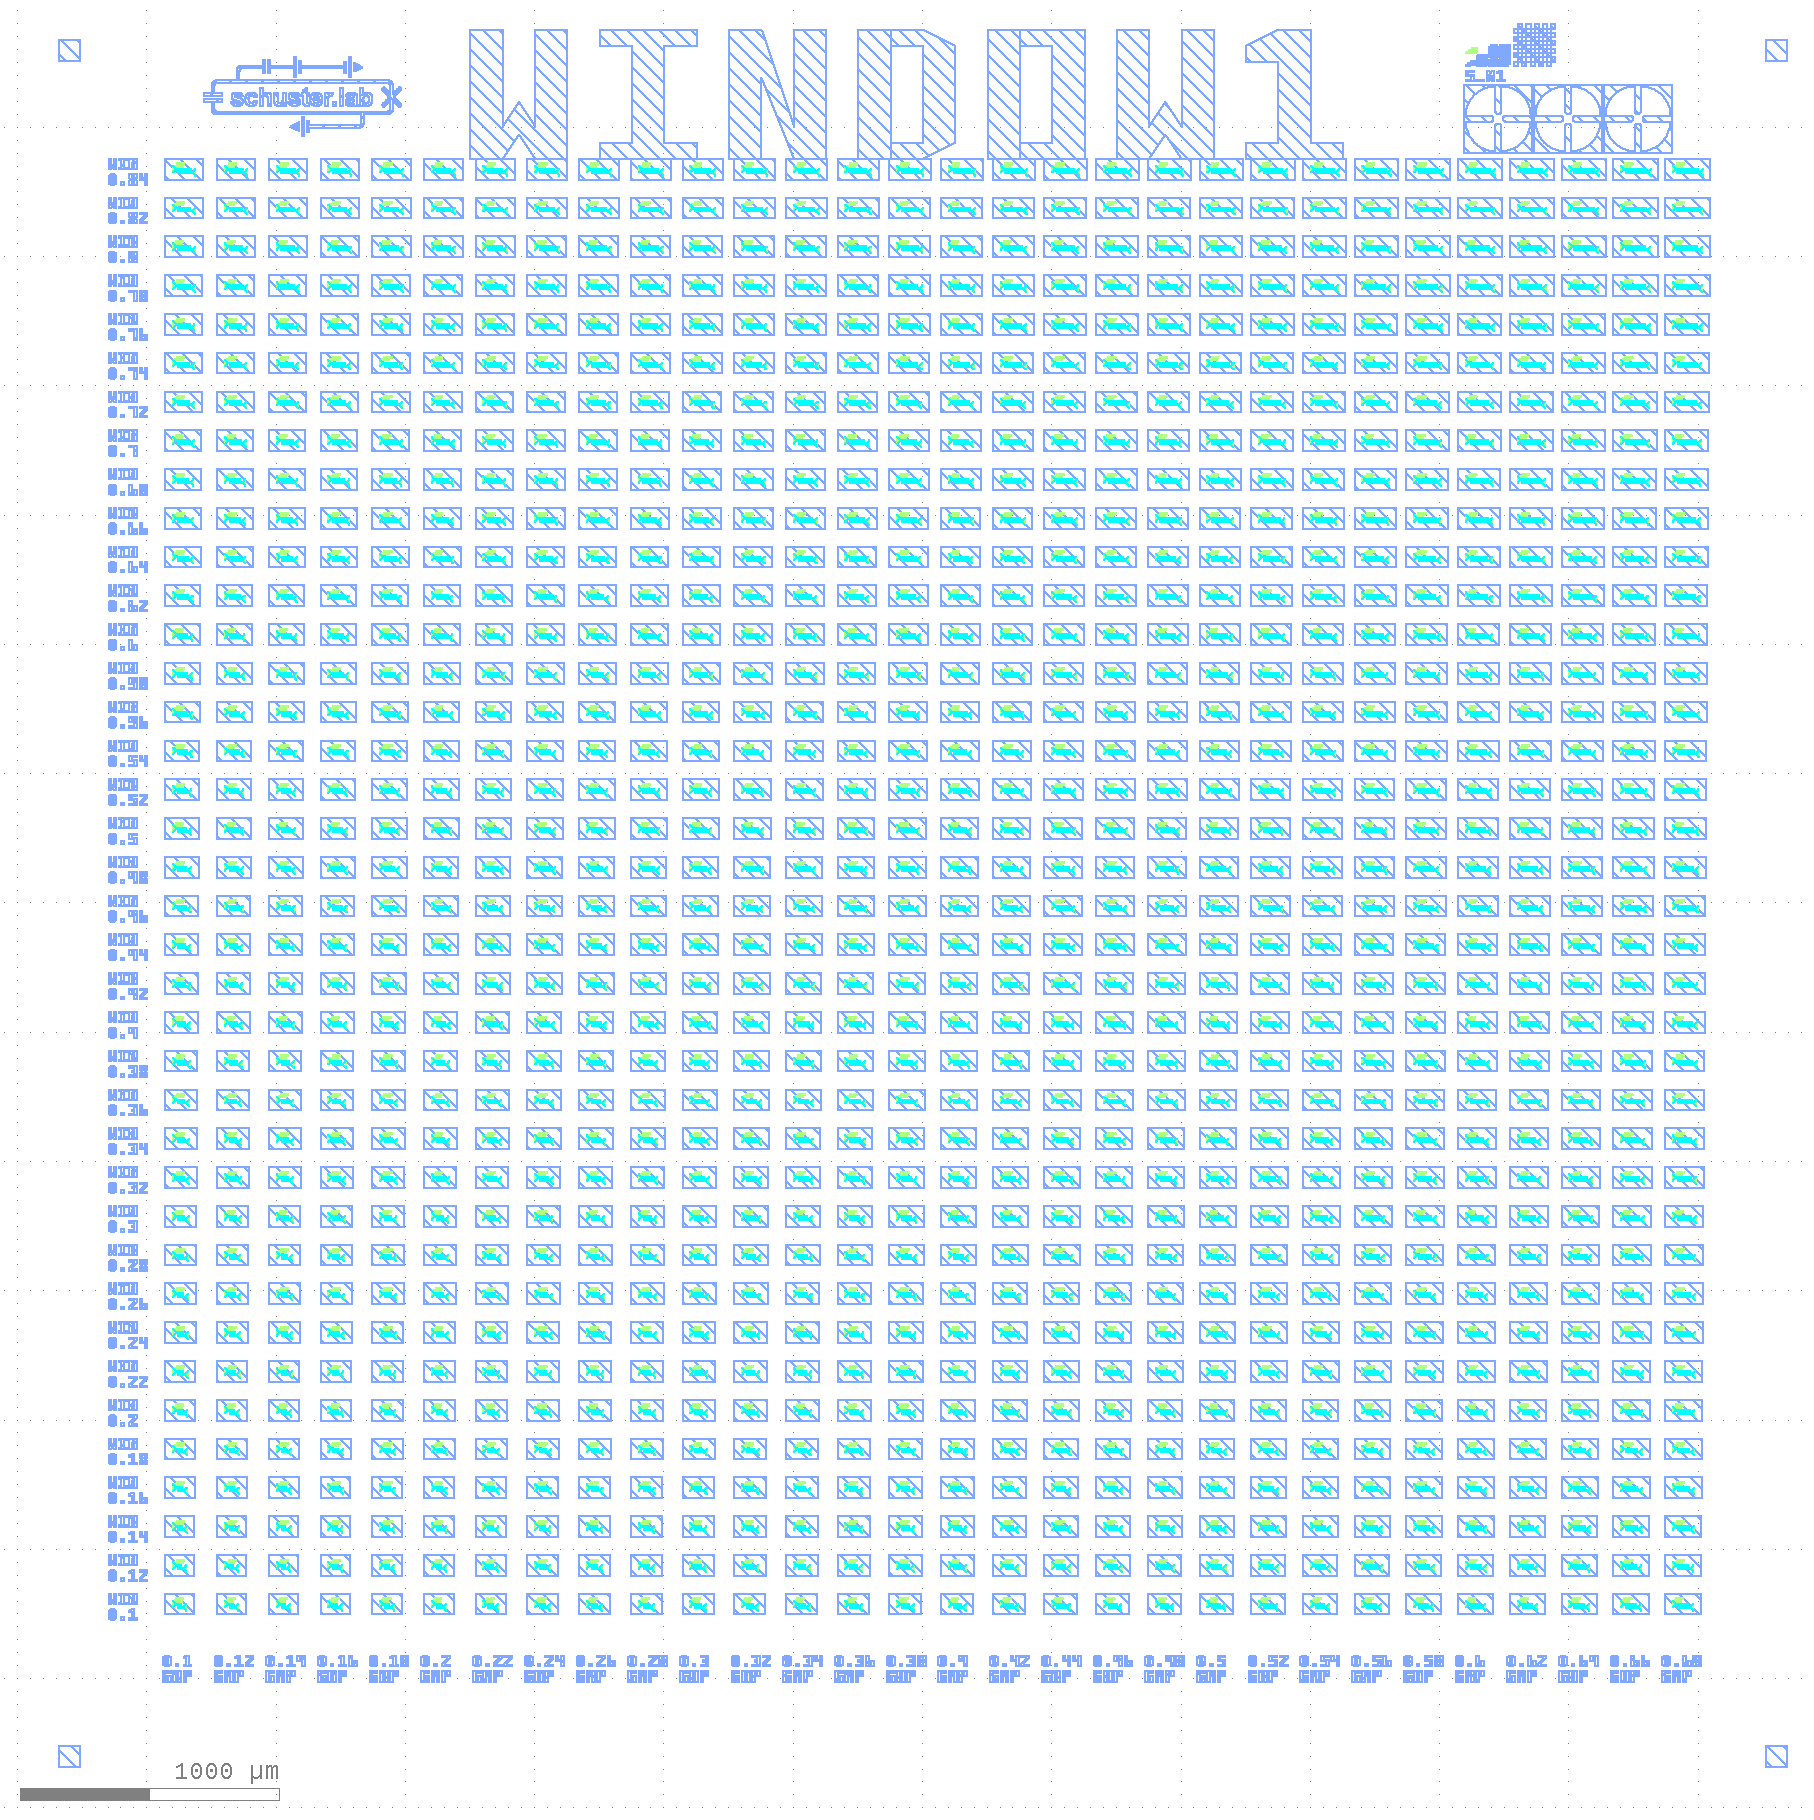

# Test Chip 6: Probeable window size vs width for JJ array
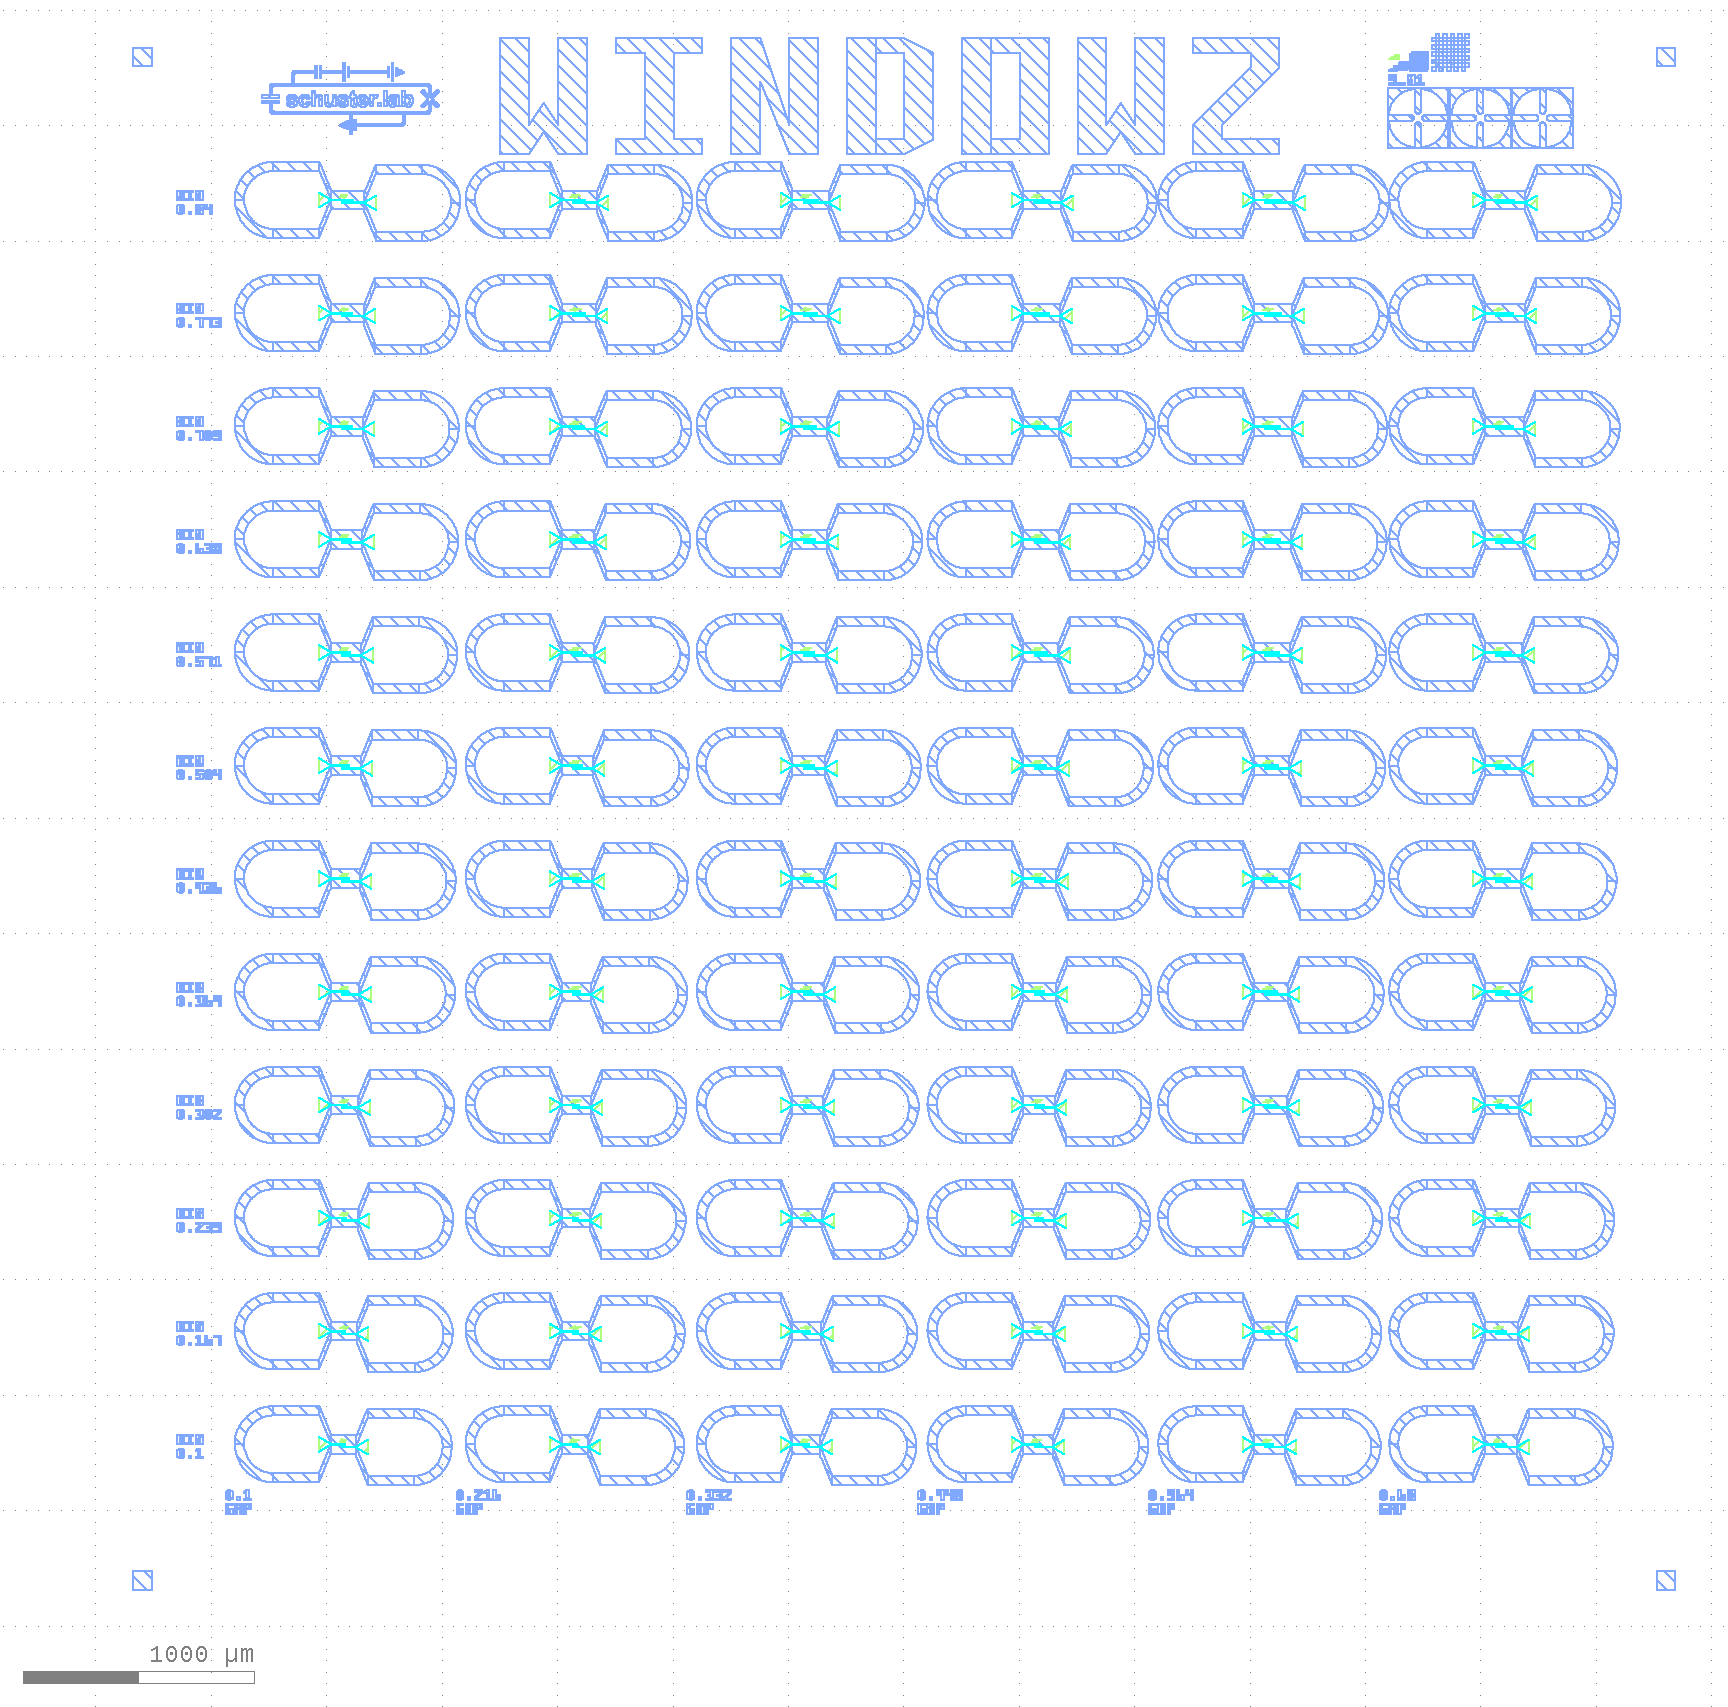

# Test Chip 7: SEM: bridge len vs width for JJ
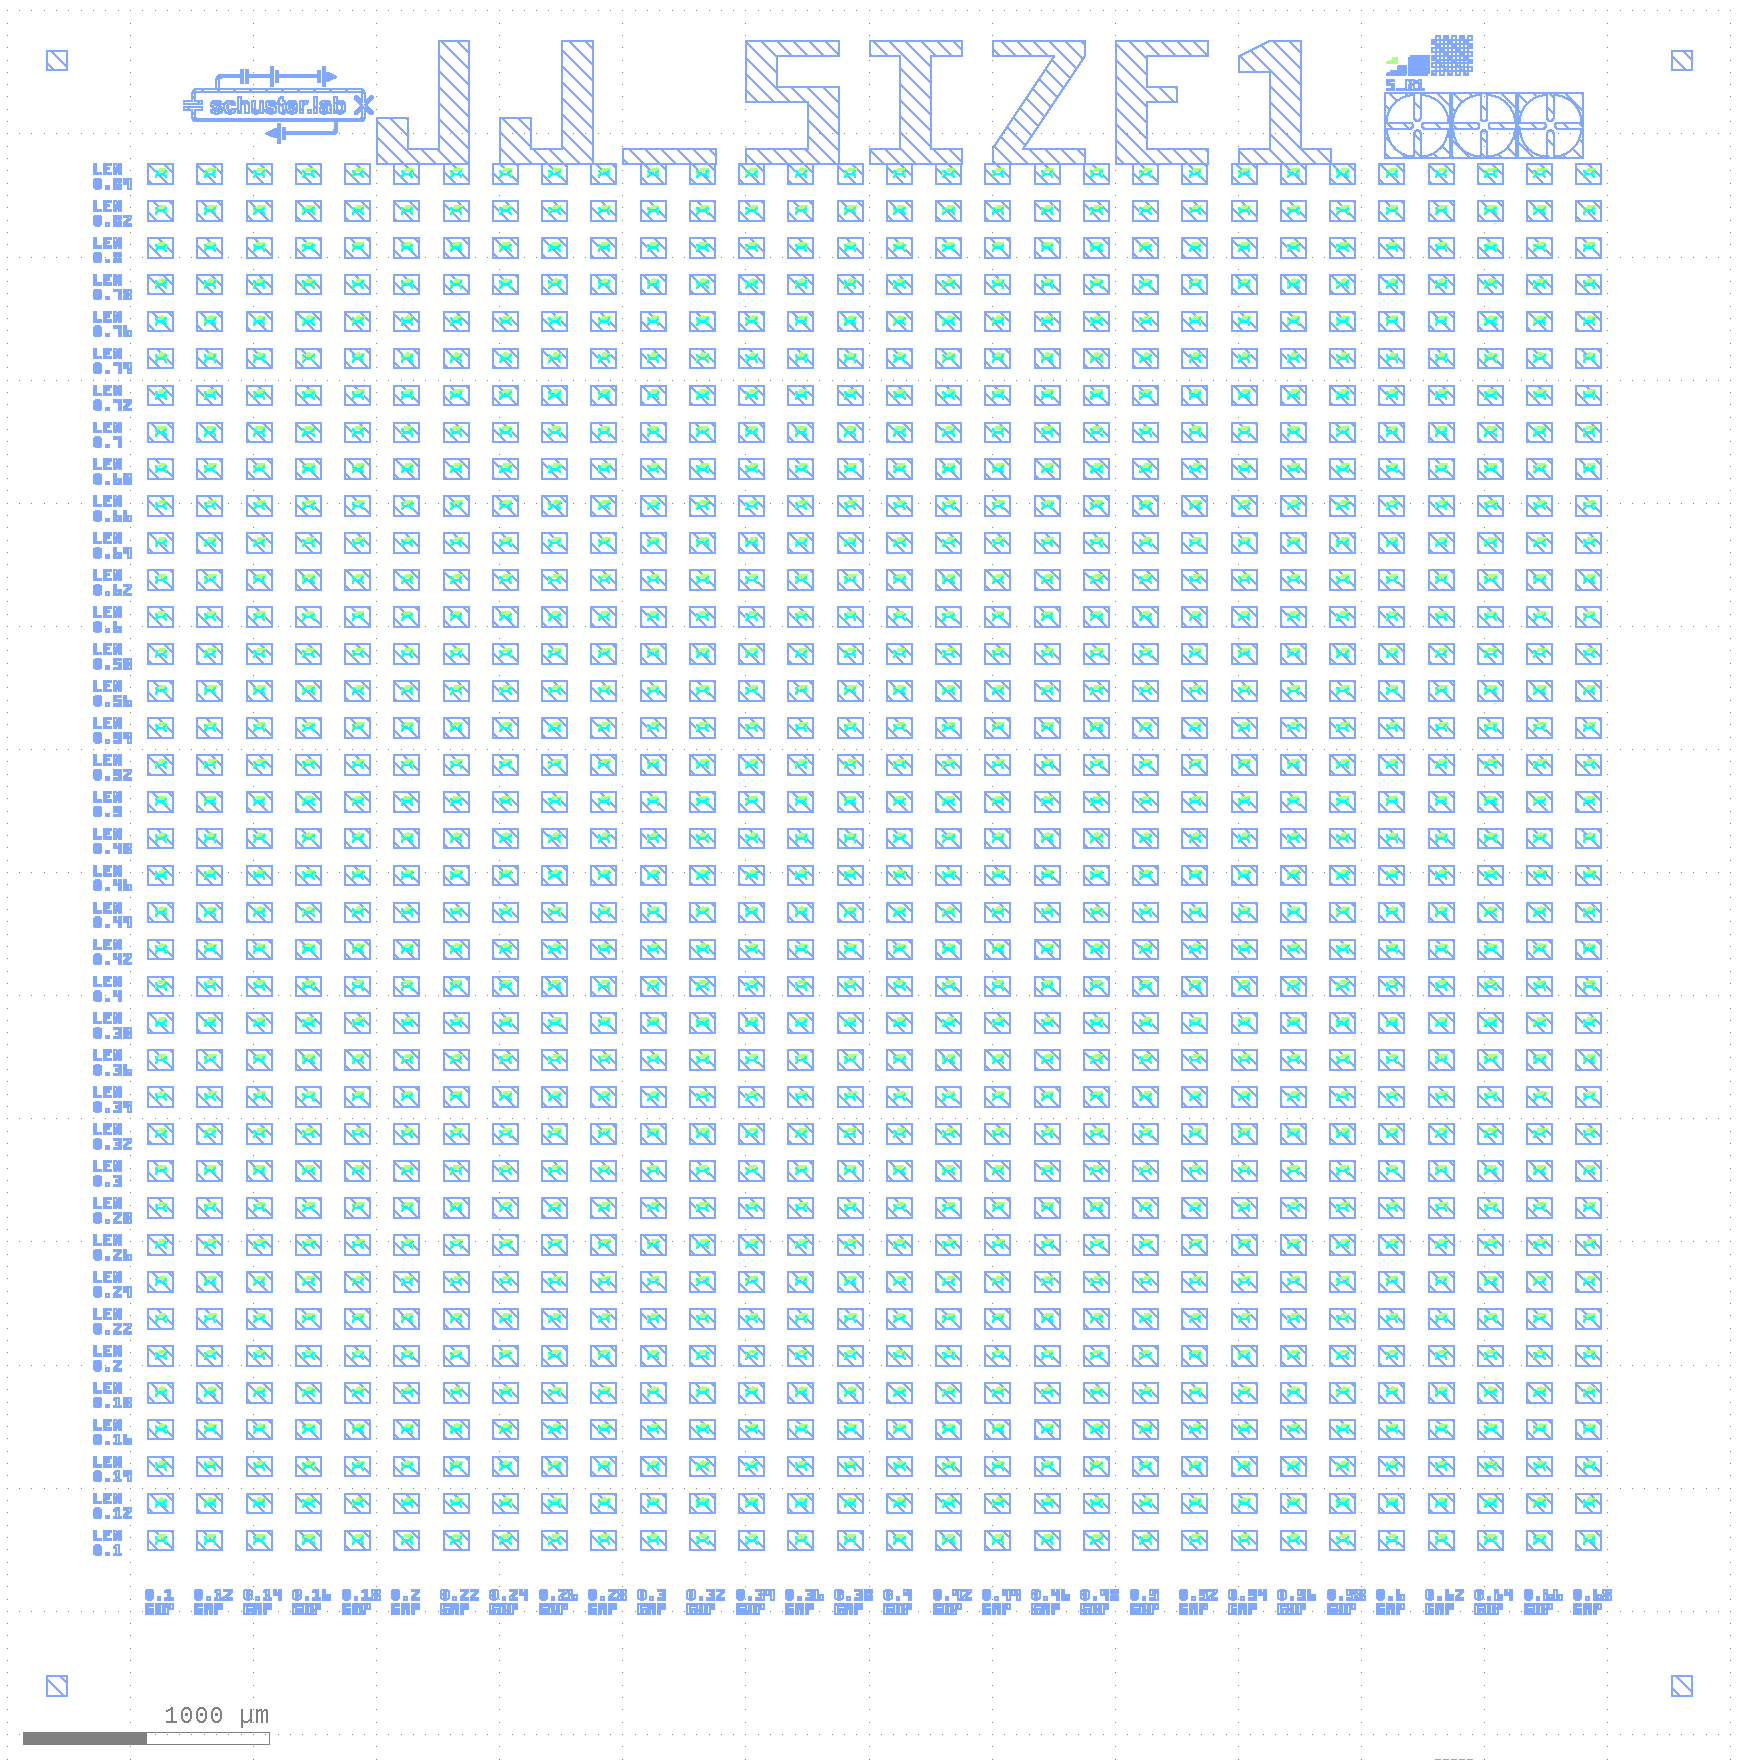

# Test Chip 8: Probeable bridge len vs width for JJ
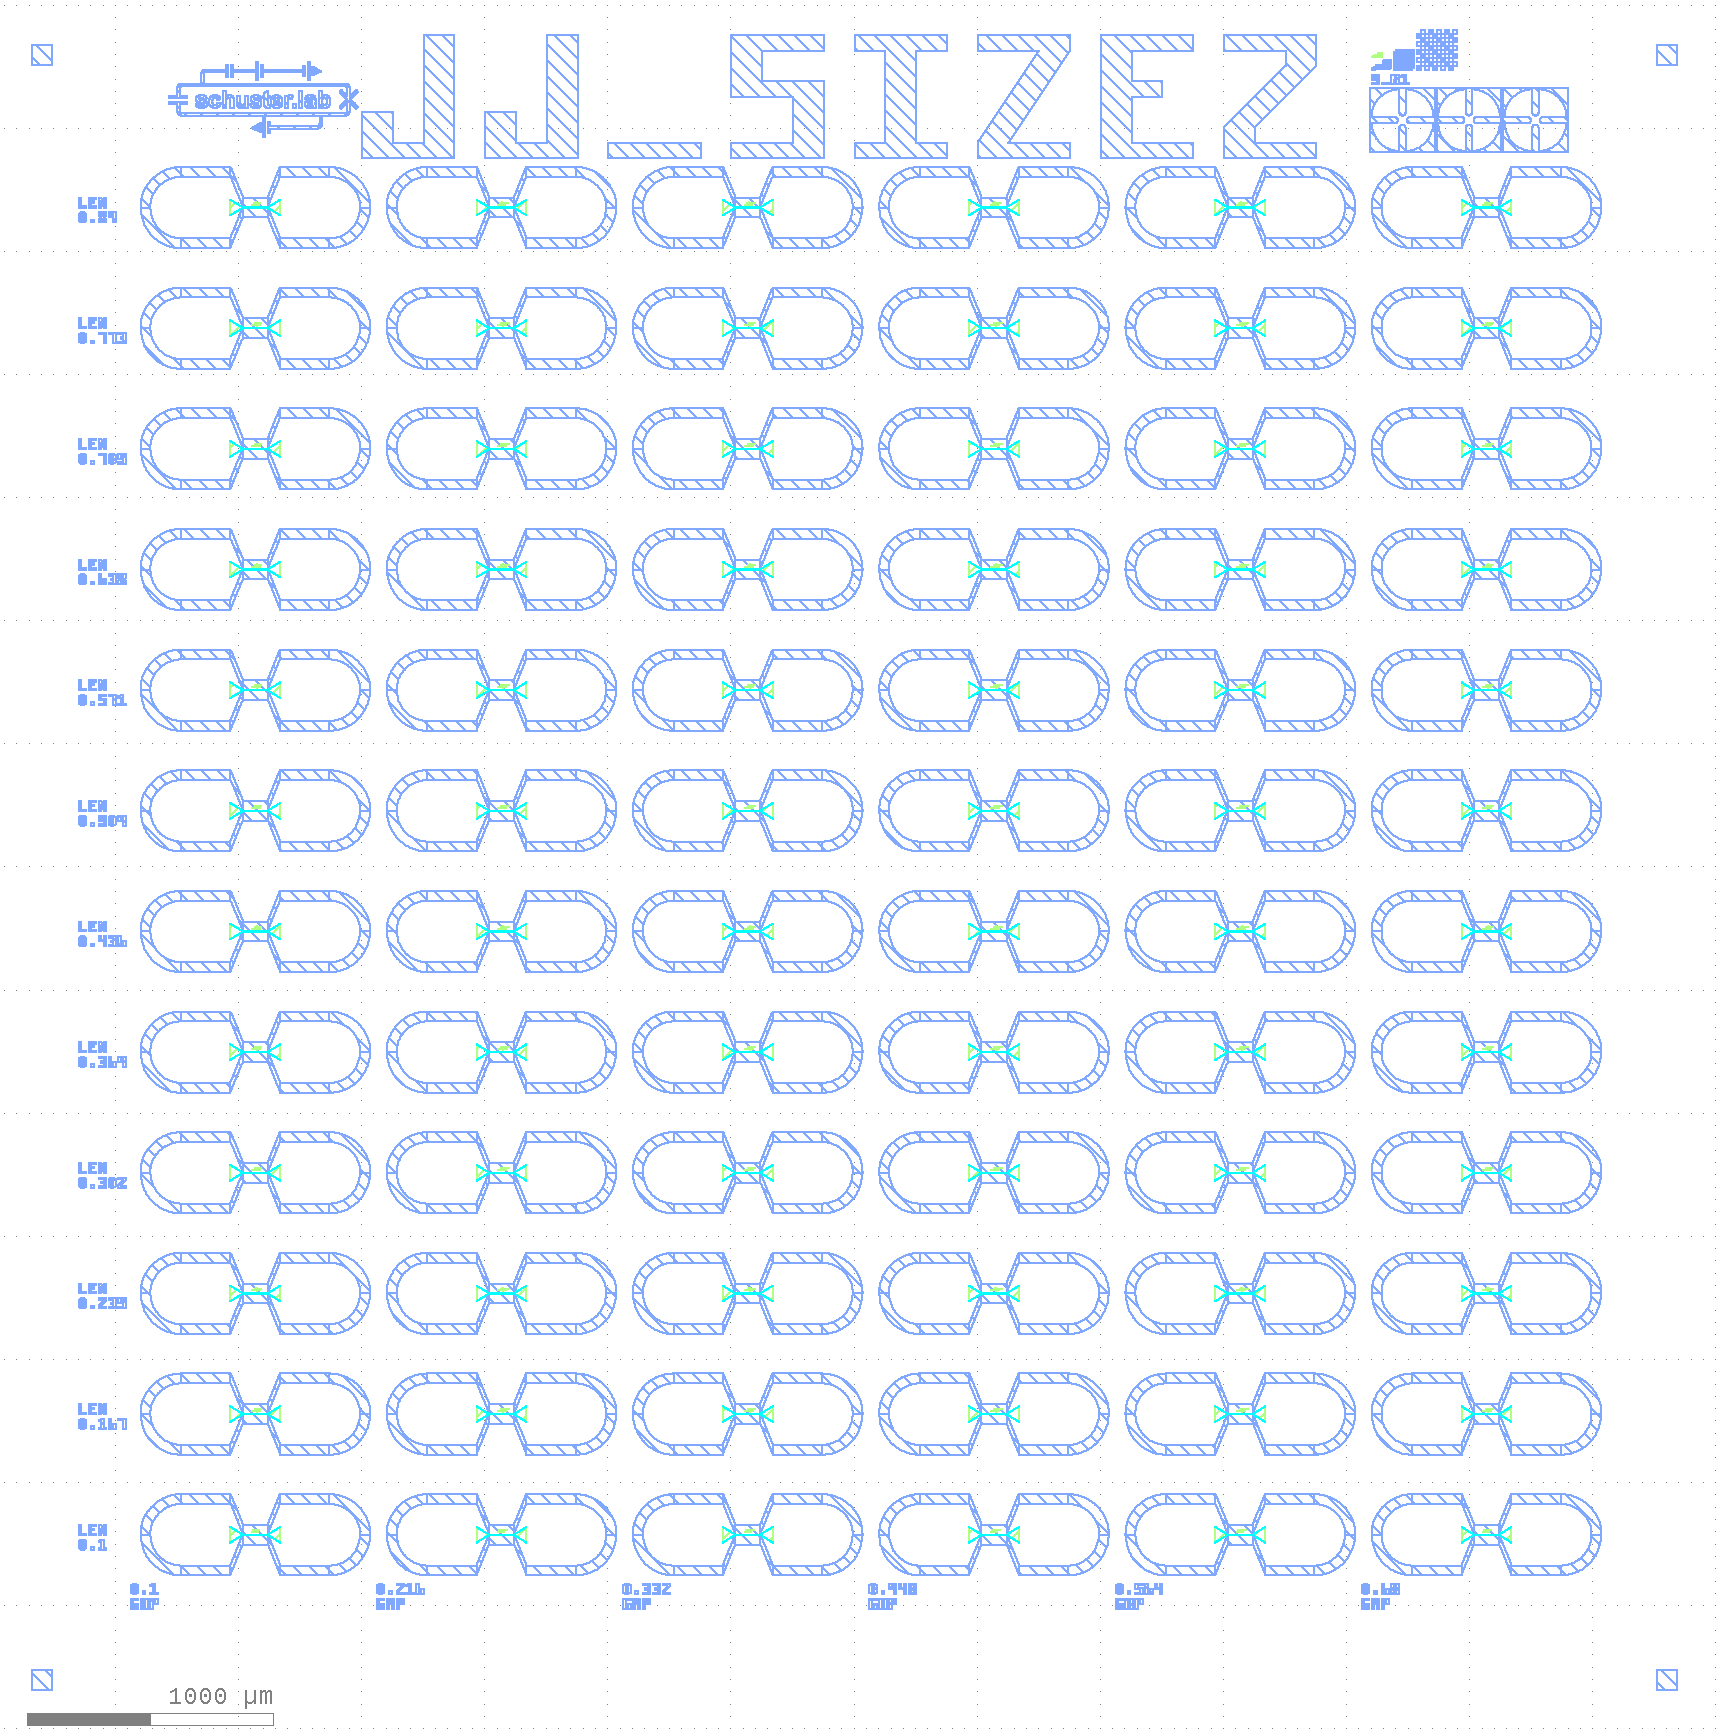

In [4]:
CHIPWIDTH=6800
CHIPHEIGHT=6800

START_GRID_X = 500
START_GRID_Y = 690

CPW_W = 10
CPW_S = 6

# Probe pad size    
PAD_W = 250
PAD_L = 200
PAD_S = 40

LEAD_LENGTH = 40

# standard doses - from paul's DMs with hannah magoon 3/26/24. UPDATE THESE
DOSE_U = 363 # uC/cm^2
DOSE_J = 1450 # uC/cm^2

# standard params
# The other params are fixed
UBRIDGE_WIDTH = 0.3 # used for both JJA and JJ, amount of undercut on sides

########### Junction Array (JA) only ###########
WINDOW_WIDTH = 0.670 # match with Chunny's FFv6 bridges
# fixed at 0.52 (LL)

JA_LENGTH = 3.0
# min 0.1 (0.15), max 6.0 (3.0) (LL)

GAP_WIDTH = 0.220 # updated 9/12/2024 to match with Chunny's FFv6 bridges
# fixed at 0.14 (LL)

NO_GAP=[50,50,50] # = no_junctions / 2

########### Small J only ###########
J_LENGTH = 0.35
# min 0.1 (0.15), max 6.0 (3.0) (LL)
# width of JJ array

# normal is 64, for simulations 16 or lower
PTDENSITY=64

default_params = {
    'dose_J': DOSE_J,
    'dose_U': DOSE_U,
    'ubridge_width': UBRIDGE_WIDTH,
    'window_width': WINDOW_WIDTH,
    'ja_length': JA_LENGTH,
    'gap_width': GAP_WIDTH,
    'j_length': J_LENGTH,
    'no_gap': NO_GAP,
    'ptDensity': PTDENSITY,
    'start_grid_x': START_GRID_X,
    'start_grid_y': START_GRID_Y,
    'cpw_s': CPW_S,
    'cpw_w': CPW_W,
    'pad_w': PAD_W,
    'pad_l': PAD_L,
    'pad_s': PAD_S,
    'lead_length': LEAD_LENGTH,
}


# Save an example of test chips

In [5]:
wafer = fl.Fluxonium4inWafer(waferID='TEST')
test_chip_index = 8
chip = fl.StandardTestChip(wafer, test_chip_index, default_params=default_params, verbose=True)
chip.save(wafer, drawCopyDXF=True, dicingBorder=False, center=True)

Number of Chips: 120
x_key: gap x_swept: [0.05  0.104 0.158 0.212 0.266 0.32 ]
y_key: len y_swept: [0.1        0.13636364 0.17272727 0.20909091 0.24545455 0.28181818
 0.31818182 0.35454545 0.39090909 0.42727273 0.46363636 0.5       ]
Saved as: c:\Users\slab\OneDrive - Stanford\Documents\github\maskLib\example\TEST_CHIP_JJ_SIZE2.dxf


# Write time for standard test-chips:

These are the areas extracted from the area calculation in KLayou on 9/24/2024

In [5]:
# these are before decreasing the size of the e-beam overlap to 15um

exposed_areas = np.array([ #NEEDS UPDATE
    375914.5408,  # test chip 0
    146882.5588, # test chip 1
    96971.7268, # test chip 2
    1432285.3548, # test chip 3
    185300.6668, # test chip 4
    989433.9048, # test chip 5
    147423.2068, # test chip 6
    395065.006405, # test chip 7
    99392.8348, # test chip 8
    # 48360.0442, # fluxonium
])
# print estimated exposure time for each chip
for i, area in enumerate(exposed_areas):
    print(f"Chip {i}: {fl.est_exposure_time(area, 1400)} minutes")

Chip 0: 17.542678570666666 minutes
Chip 1: 6.854519410666667 minutes
Chip 2: 4.525347250666667 minutes
Chip 3: 66.839983224 minutes
Chip 4: 8.647364450666666 minutes
Chip 5: 46.173582224 minutes
Chip 6: 6.879749650666667 minutes
Chip 7: 18.436366965566666 minutes
Chip 8: 4.638332290666667 minutes


# Full 4in Test Wafer 7mm Chips Fluxonium Example 

In [10]:
w = fl.Fluxonium4inWafer(waferID='TestFluxoniumWafer')

file_name = 'FluxoniumWaferDXF/FF+V6_CHIP_FFV6_probe.dxf'

# import fluxonium chip, can change to use a different chip!
chip_fluxonium = fl.ImportedChip(w, "Fluxonium", '5_M1',
                        file_name=file_name,
                        rename_dict={'L5D0_M1':'5_M1', '60_GAP': '60_SE1_JJ',
                                'L20D0_PIN': '20_SE1', 'L60D0_GAP': '60_SE1_JJ'}, do_chip_title=True)

w.setDefaultChip(chip_fluxonium)

#######################################################
# standard test chips in locations near center of chip, resonators as well
#######################################################

# locs for waffle chips
waffle_locs = [24, 25, 26, 33, 34, 35, 48, 49, 50, 57, 58, 59, 72, 73, 74, 81, 82, 83]

# no waffle locs
no_waffe_locs = [36, 37, 38, 45, 46, 47, 60, 61, 62, 69, 70, 71, 84, 85, 86, 93, 94, 95]

# chip 0 locs
chip0_locs = [27, 39, 51, 63, 75, 87]

# chip 6 locs
chip6_locs = [28, 40, 52, 64, 76, 88]

# chip 8 locs
chip8_locs = [31, 43, 55, 67, 79, 91]

# transmon locs
transmon_locs = [32, 44, 56, 68, 80, 92]

chip = fl.ImportedChip(w, 'Res_Waffle', '5_M1', file_name = 'FluxoniumWaferDXF/resonator_fixed_waffle.dxf',
                         rename_dict={'L5D10': '5_M1'})
chip.save(w, drawCopyDXF=False, dicingBorder=True, center=True)
for loc in waffle_locs:
    w.setChipBuffer(chip, loc)

chip = fl.ImportedChip(w, 'Res_No_Waffle', '5_M1', file_name = 'FluxoniumWaferDXF/resonator_fixed_no_waffle.dxf',
                         rename_dict={'L5D10': '5_M1'})
chip.save(w, drawCopyDXF=False, dicingBorder=True, center=True)
for loc in no_waffe_locs:
    w.setChipBuffer(chip, loc)

chip = fl.StandardTestChip(w, 0, default_params=default_params)
chip.save(w, drawCopyDXF=False, dicingBorder=True, center=True)    
for loc in chip0_locs:
    w.setChipBuffer(chip, loc)

chip = fl.StandardTestChip(w, 6, default_params=default_params)
chip.save(w, drawCopyDXF=False, dicingBorder=True, center=True)
for loc in chip6_locs:
    w.setChipBuffer(chip, loc)

chip = fl.StandardTestChip(w, 8, default_params=default_params)
chip.save(w, drawCopyDXF=False, dicingBorder=True, center=True)
for loc in chip8_locs:
    w.setChipBuffer(chip, loc)

chip = fl.ImportedChip(w, 'Coherence_NB9A_01', '5_M1',
                         file_name='FluxoniumWaferDXF/20231114_coherence_tunable_qubit_chip.dxf',
                         rename_dict={'L0D0_0': '5_M1', 'PIN': '20_SE1', 'GAP': '60_SE1_JJ'},
                         chipWidth=6230, chipHeight=6230)
chip.save(w, drawCopyDXF=False, dicingBorder=True, center=True)
for loc in transmon_locs:
    w.setChipBuffer(chip, loc)

w.populate()

w.save()

Number of Chips: 120
Dose table saved to: c:\Users\slab\OneDrive - Stanford\Documents\github\maskLib\example\dose_table_DOSE_2024-09-19.txt
Saved as: c:\Users\slab\OneDrive - Stanford\Documents\github\maskLib\example\TestFluxoniumWafer.dxf


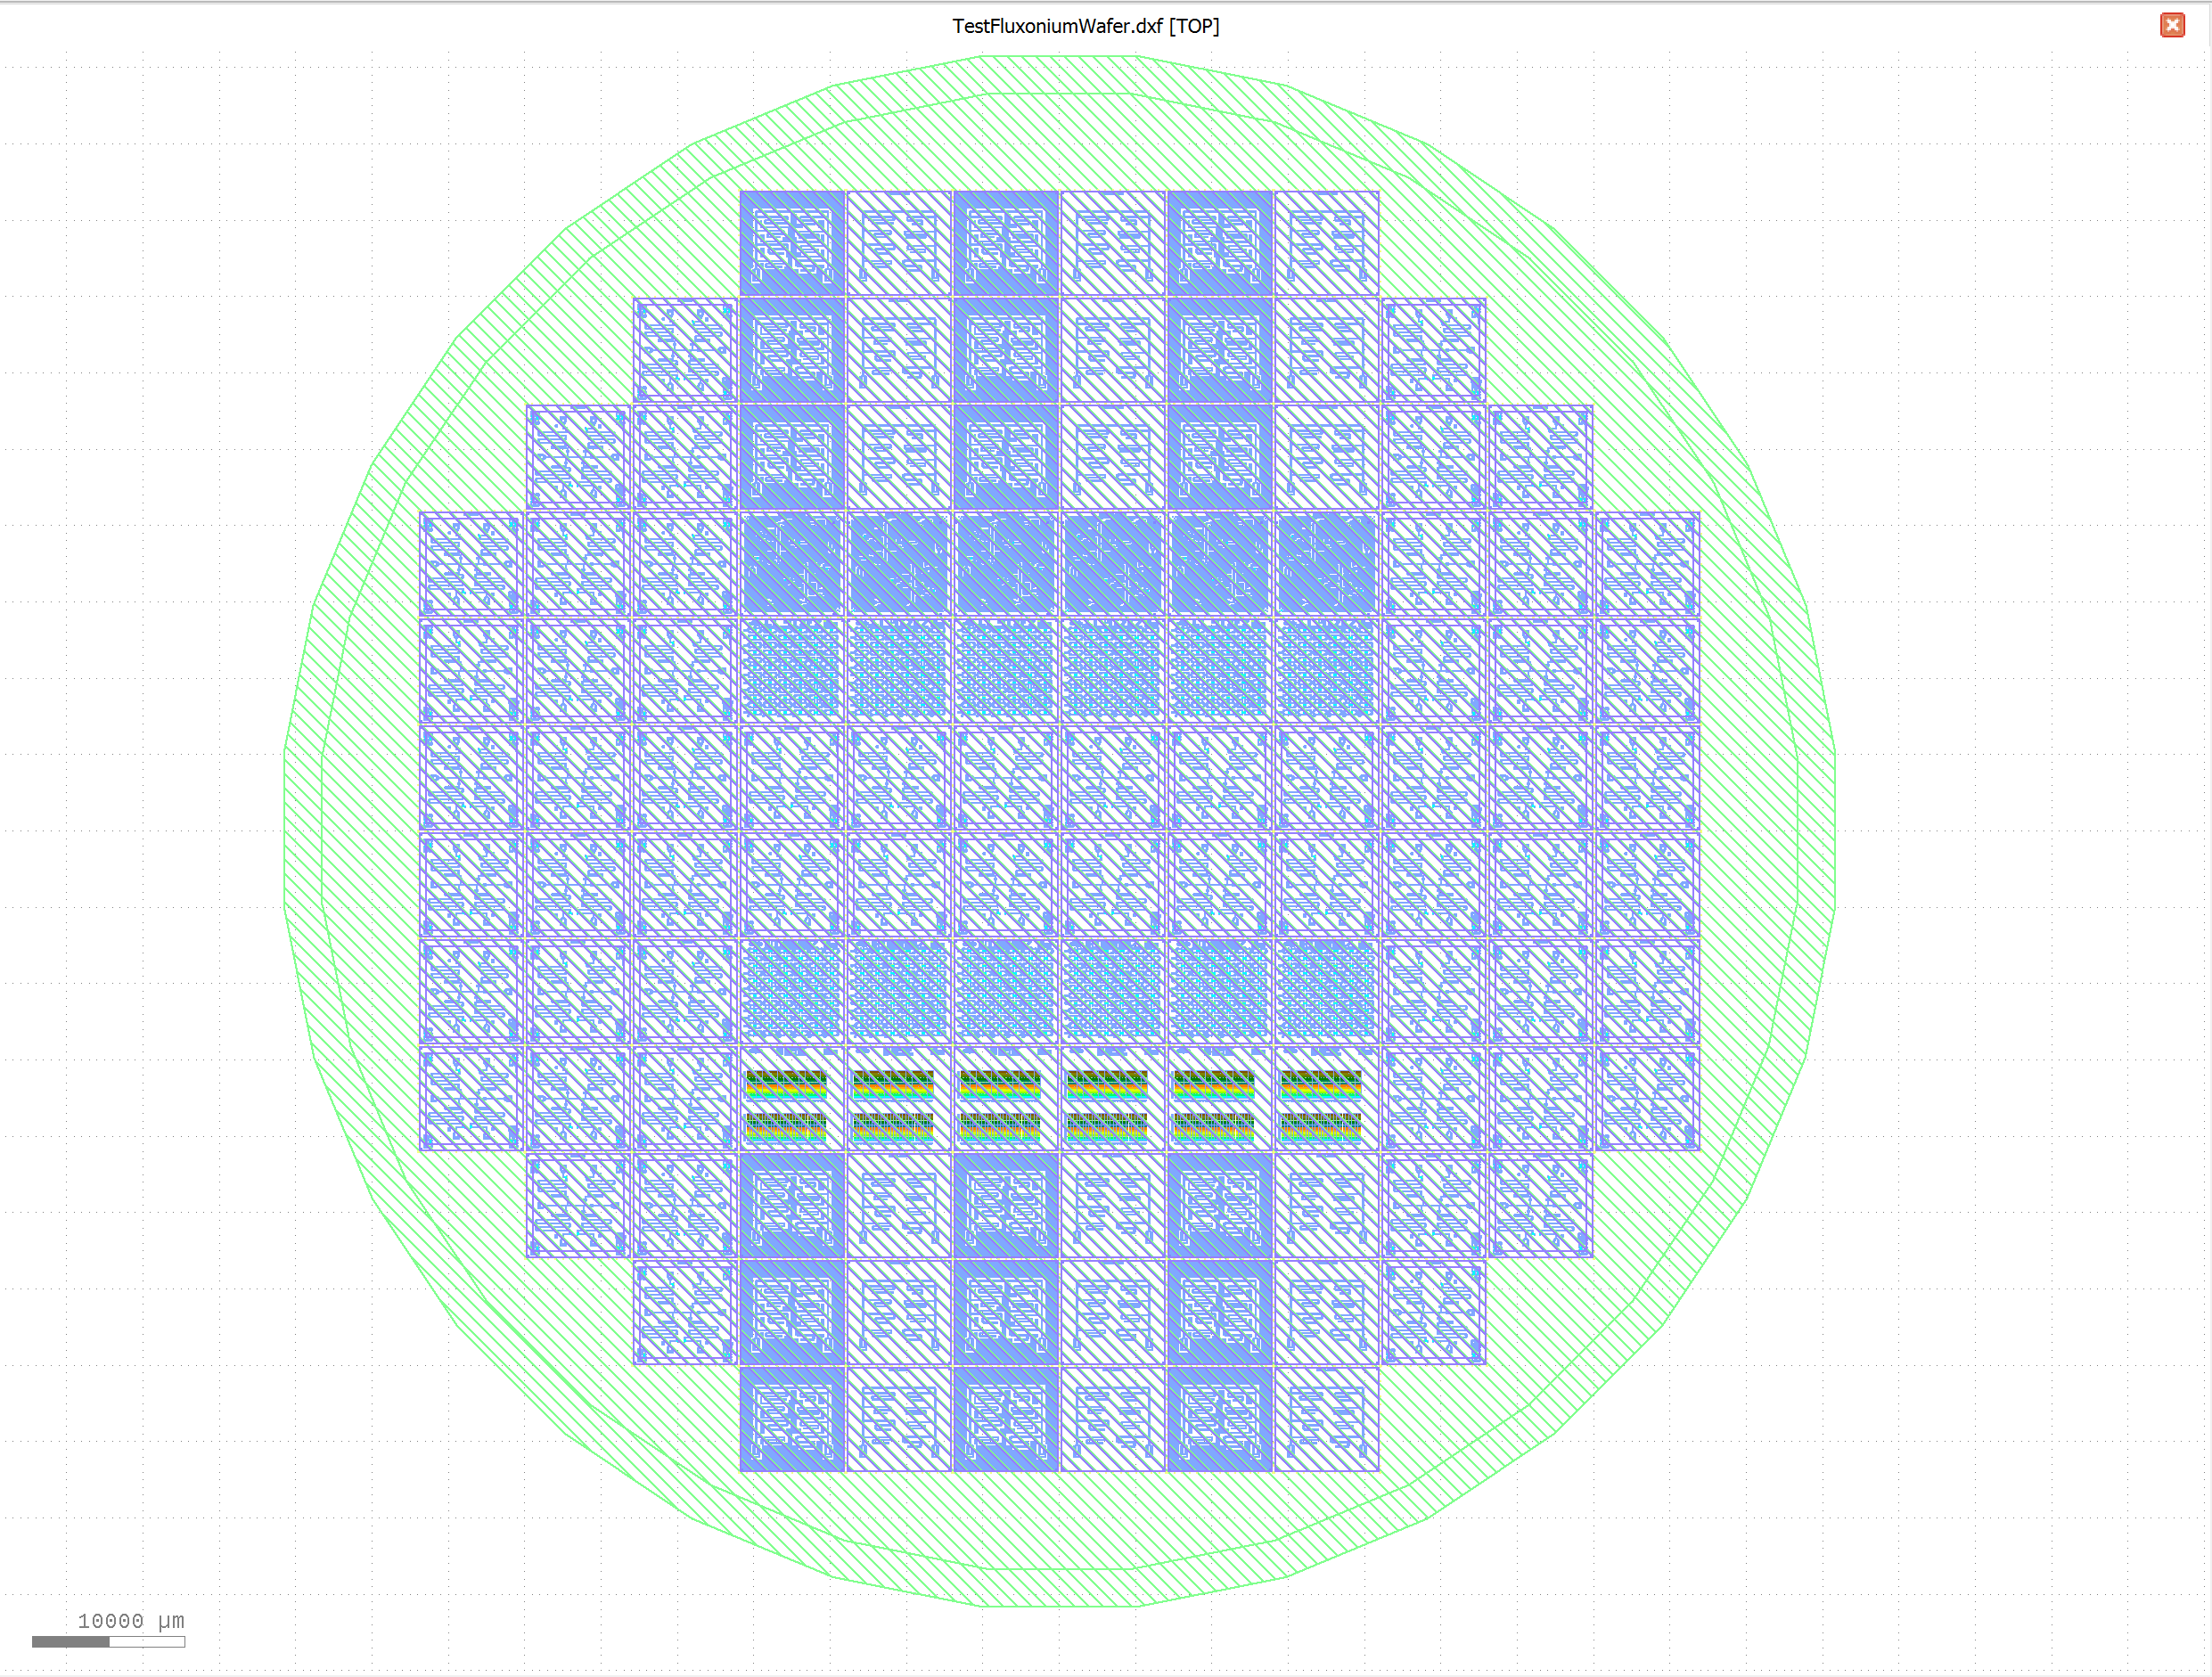

In [12]:
# estimate exposure time
total_ebeam_area = 6661932.1164
estimated_dose = 1400
fl.est_exposure_time(total_ebeam_area, estimated_dose)/60
# for above, ~5 hours, where a lot of it is from the 6 dose arrays.

5.181502757199999

## Dose array file:
*NOTE: doses for 60/600 layers (undercut) are multiplied by 4 for convenience in BEAMER assignment*
```
# LAYER ASSIGNMENT TABLE
# Layer/Datatype, Assignment Value
200_SE1_dose_00_500_uC, 500.0
201_SE1_dose_01_560_uC, 560.0
202_SE1_dose_02_620_uC, 620.0
203_SE1_dose_03_680_uC, 680.0
204_SE1_dose_04_740_uC, 740.0
205_SE1_dose_05_800_uC, 800.0
206_SE1_dose_06_860_uC, 860.0
207_SE1_dose_07_920_uC, 920.0
208_SE1_dose_08_980_uC, 980.0
209_SE1_dose_09_1040_uC, 1040.0
210_SE1_dose_10_1100_uC, 1100.0
211_SE1_dose_11_1160_uC, 1160.0
212_SE1_dose_12_1220_uC, 1220.0
213_SE1_dose_13_1280_uC, 1280.0
214_SE1_dose_14_1340_uC, 1340.0
215_SE1_dose_15_1400_uC, 1400.0
216_SE1_dose_16_1460_uC, 1460.0
217_SE1_dose_17_1520_uC, 1520.0
218_SE1_dose_18_1580_uC, 1580.0
219_SE1_dose_19_1640_uC, 1640.0
220_SE1_dose_20_1700_uC, 1700.0
221_SE1_dose_21_1760_uC, 1760.0
222_SE1_dose_22_1820_uC, 1820.0
223_SE1_dose_23_1880_uC, 1880.0
224_SE1_dose_24_1940_uC, 1940.0
225_SE1_dose_25_2000_uC, 2000.0
600_SE1_JJ_dose_00_100_uC, 400.0
601_SE1_JJ_dose_01_145_uC, 581.8181818181818
602_SE1_JJ_dose_02_191_uC, 763.6363636363636
603_SE1_JJ_dose_03_236_uC, 945.4545454545455
604_SE1_JJ_dose_04_282_uC, 1127.2727272727273
605_SE1_JJ_dose_05_327_uC, 1309.090909090909
606_SE1_JJ_dose_06_373_uC, 1490.909090909091
607_SE1_JJ_dose_07_418_uC, 1672.7272727272727
608_SE1_JJ_dose_08_464_uC, 1854.5454545454545
609_SE1_JJ_dose_09_509_uC, 2036.3636363636363
610_SE1_JJ_dose_10_555_uC, 2218.181818181818
611_SE1_JJ_dose_11_600_uC, 2400.0
20_SE1, 1450
60_SE1_JJ, 1452.0
L200D0_SE1_dose_00_500_uC, 500.0
L201D0_SE1_dose_01_560_uC, 560.0
L202D0_SE1_dose_02_620_uC, 620.0
L203D0_SE1_dose_03_680_uC, 680.0
L204D0_SE1_dose_04_740_uC, 740.0
L205D0_SE1_dose_05_800_uC, 800.0
L206D0_SE1_dose_06_860_uC, 860.0
L207D0_SE1_dose_07_920_uC, 920.0
L208D0_SE1_dose_08_980_uC, 980.0
L209D0_SE1_dose_09_1040_uC, 1040.0
L210D0_SE1_dose_10_1100_uC, 1100.0
L211D0_SE1_dose_11_1160_uC, 1160.0
L212D0_SE1_dose_12_1220_uC, 1220.0
L213D0_SE1_dose_13_1280_uC, 1280.0
L214D0_SE1_dose_14_1340_uC, 1340.0
L215D0_SE1_dose_15_1400_uC, 1400.0
L216D0_SE1_dose_16_1460_uC, 1460.0
L217D0_SE1_dose_17_1520_uC, 1520.0
L218D0_SE1_dose_18_1580_uC, 1580.0
L219D0_SE1_dose_19_1640_uC, 1640.0
L220D0_SE1_dose_20_1700_uC, 1700.0
L221D0_SE1_dose_21_1760_uC, 1760.0
L222D0_SE1_dose_22_1820_uC, 1820.0
L223D0_SE1_dose_23_1880_uC, 1880.0
L224D0_SE1_dose_24_1940_uC, 1940.0
L225D0_SE1_dose_25_2000_uC, 2000.0
L600D0_SE1_JJ_dose_00_100_uC, 400.0
L601D0_SE1_JJ_dose_01_145_uC, 581.8181818181818
L602D0_SE1_JJ_dose_02_191_uC, 763.6363636363636
L603D0_SE1_JJ_dose_03_236_uC, 945.4545454545455
L604D0_SE1_JJ_dose_04_282_uC, 1127.2727272727273
L605D0_SE1_JJ_dose_05_327_uC, 1309.090909090909
L606D0_SE1_JJ_dose_06_373_uC, 1490.909090909091
L607D0_SE1_JJ_dose_07_418_uC, 1672.7272727272727
L608D0_SE1_JJ_dose_08_464_uC, 1854.5454545454545
L609D0_SE1_JJ_dose_09_509_uC, 2036.3636363636363
L610D0_SE1_JJ_dose_10_555_uC, 2218.181818181818
L611D0_SE1_JJ_dose_11_600_uC, 2400.0
L20D0_SE1, 1450
L60D0_SE1_JJ, 1452.0
```

# Custom Test Chip Examples

It is possible to customize test chips more

## Changing ranges of dose array chip 0 and # of things in sweep

In [20]:
wafer = fl.Fluxonium4inWafer(waferID='TEST')
test_chip_index = 0

# update dose ranges, x is fullcut dose, y is undercut dose
x_low = 900
x_high = 4000
y_low = 300
y_high = 900

# update_no_columns = 6
# update_no_rows = 3
# add probe pads
no_column = 6
no_row = 3
# add probe pads
probe_pads = True

chip = fl.StandardTestChip(wafer, test_chip_index, default_params=default_params,
                           verbose=True, x_low=x_low, x_high=x_high, y_low=y_low,
                           y_high=y_high, no_column=no_column, no_row=no_row,
                           probe_pads=probe_pads)
chip.save(wafer, drawCopyDXF=True, dicingBorder=False, center=True)

Number of Chips: 120
x_key: DJ x_swept: [ 900. 1520. 2140. 2760. 3380. 4000.]
y_key: DU y_swept: [300. 600. 900.]
Dose table saved to: c:\Users\slab\OneDrive - Stanford\Documents\github\maskLib\example\dose_table_DOSE_2024-09-19.txt
Saved as: c:\Users\slab\OneDrive - Stanford\Documents\github\maskLib\example\TEST_CHIP_DOSE.dxf


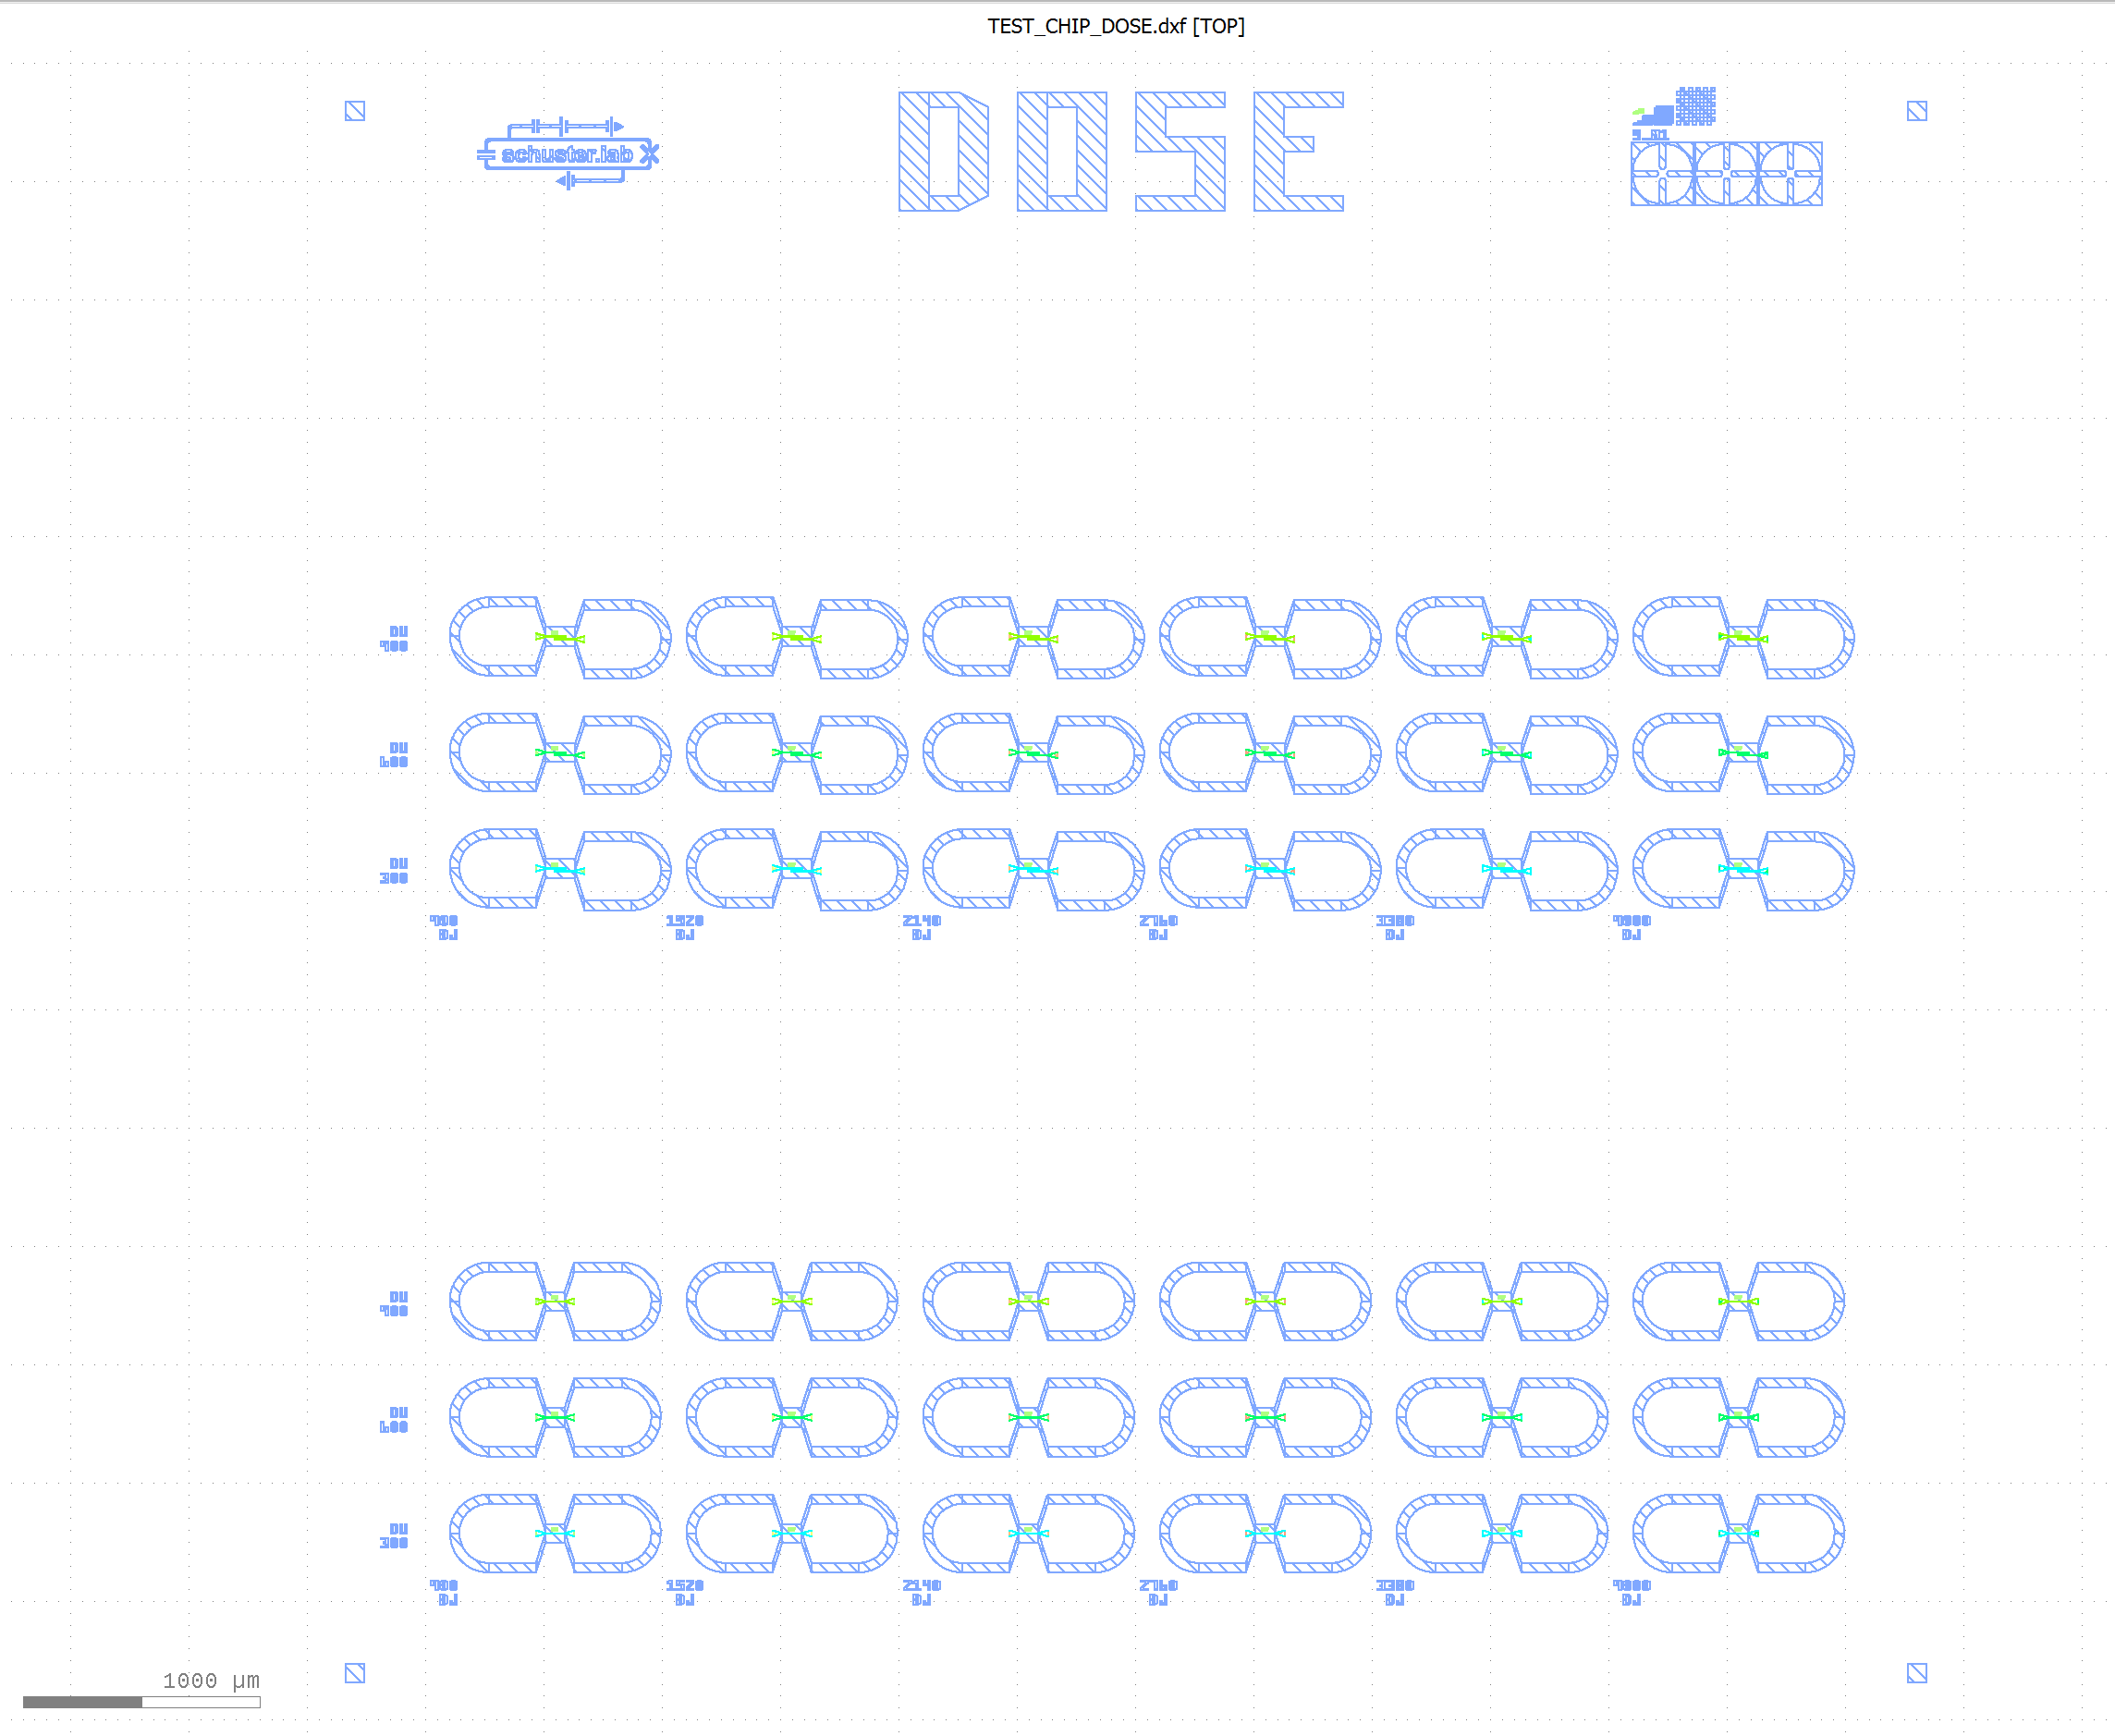

## Fully custom test chip
For this, just use the TestChip class

In [26]:
##########grid 1##########
##if want more grid per chip, copy paste the cell and adjust the variables

params = []

params.append({
    'M1_pads': False,   # Probe pads? No -> tigher packing
    # Choose the tested structure
    'test_flxn': False,    #TODO
    'test_JA': True,
    'test_smallJ': False,
    # Vary dose (hence separate layers) for Jlayer (each row) or Ulayer (each column)
    'dose_Jlayer_row': False,
    'dose_Ulayer_column': False,
    'ulayer_edge': True,  # Ulayer edge gap?
    'start_grid_x' : 500,
    'start_grid_y' : 690,
})

no_row = 38 # how many rows
no_column = 30 # how many columns

# Select the parameter being swept on x axis
x_swept = np.linspace(0.10,0.68, no_column)
gap_width = fl.grid_from_row(x_swept, no_row)
x_key = 'gap' # printed x label, <3 letters allowed
x_var = gap_width
print(x_key + str(x_swept))

# Select the parameter being swept on y axis
y_key = 'win' # printed y label, <3 letters allowed
y_swept = np.linspace(0.10,0.84,no_row)
window_width = fl.grid_from_column(y_swept, no_column, no_row) 
y_var = window_width
print(y_key + str(y_swept))

grid = [no_column] * no_row

# The other params are fixed
ubridge_width = fl.grid_from_entry(0.3, no_row, no_column)

########### JA only ###########
#window_width = grid_from_entry(0.52, no_row, no_column)
# fixed at 0.52 (LL)

ja_length = fl.grid_from_entry(3.0, no_row, no_column)
# min 0.1 (0.15), max 6.0 (3.0) (LL)

#gap_width = grid_from_entry(0.14, no_row, no_column)
# fixed at 0.14 (LL)

no_gap=[50,] # = no_junctions / 2

########### Small J only ###########
j_length = fl.grid_from_entry(0.35, no_row, no_column)
# min 0.1 (0.15), max 6.0 (3.0) (LL)

params[0].update({
    'grid': grid,
    'x_var': x_var,
    'y_var': y_var,
    'x_key': x_key,
    'y_key': y_key,
    'ja_length': ja_length,
    'j_length': j_length,
    'gap_width': gap_width,
    'window_width': window_width,
    'ubridge_width': ubridge_width,
    'no_gap': no_gap,
    'no_column': no_column,
    'no_row': no_row,
    'pad_w': PAD_W,
    'pad_s': PAD_S,
    'pad_l': PAD_L,
    'cpw_s': CPW_S,
    'ptDensity': PTDENSITY,
    'doseJ': DOSE_J,
    'doseU': DOSE_U,
    'lead_length': LEAD_LENGTH,
})

wafer = fl.Fluxonium4inWafer(waferID='TEST')
chip = fl.TestChip(wafer, "CustomChip", "5_M1",params=params)
chip.save(wafer, drawCopyDXF=True, dicingBorder=False, center=True)

gap[0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36
 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64
 0.66 0.68]
win[0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36
 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64
 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84]
Number of Chips: 120
Saved as: c:\Users\slab\OneDrive - Stanford\Documents\github\maskLib\example\TEST_CHIP_CustomChip.dxf


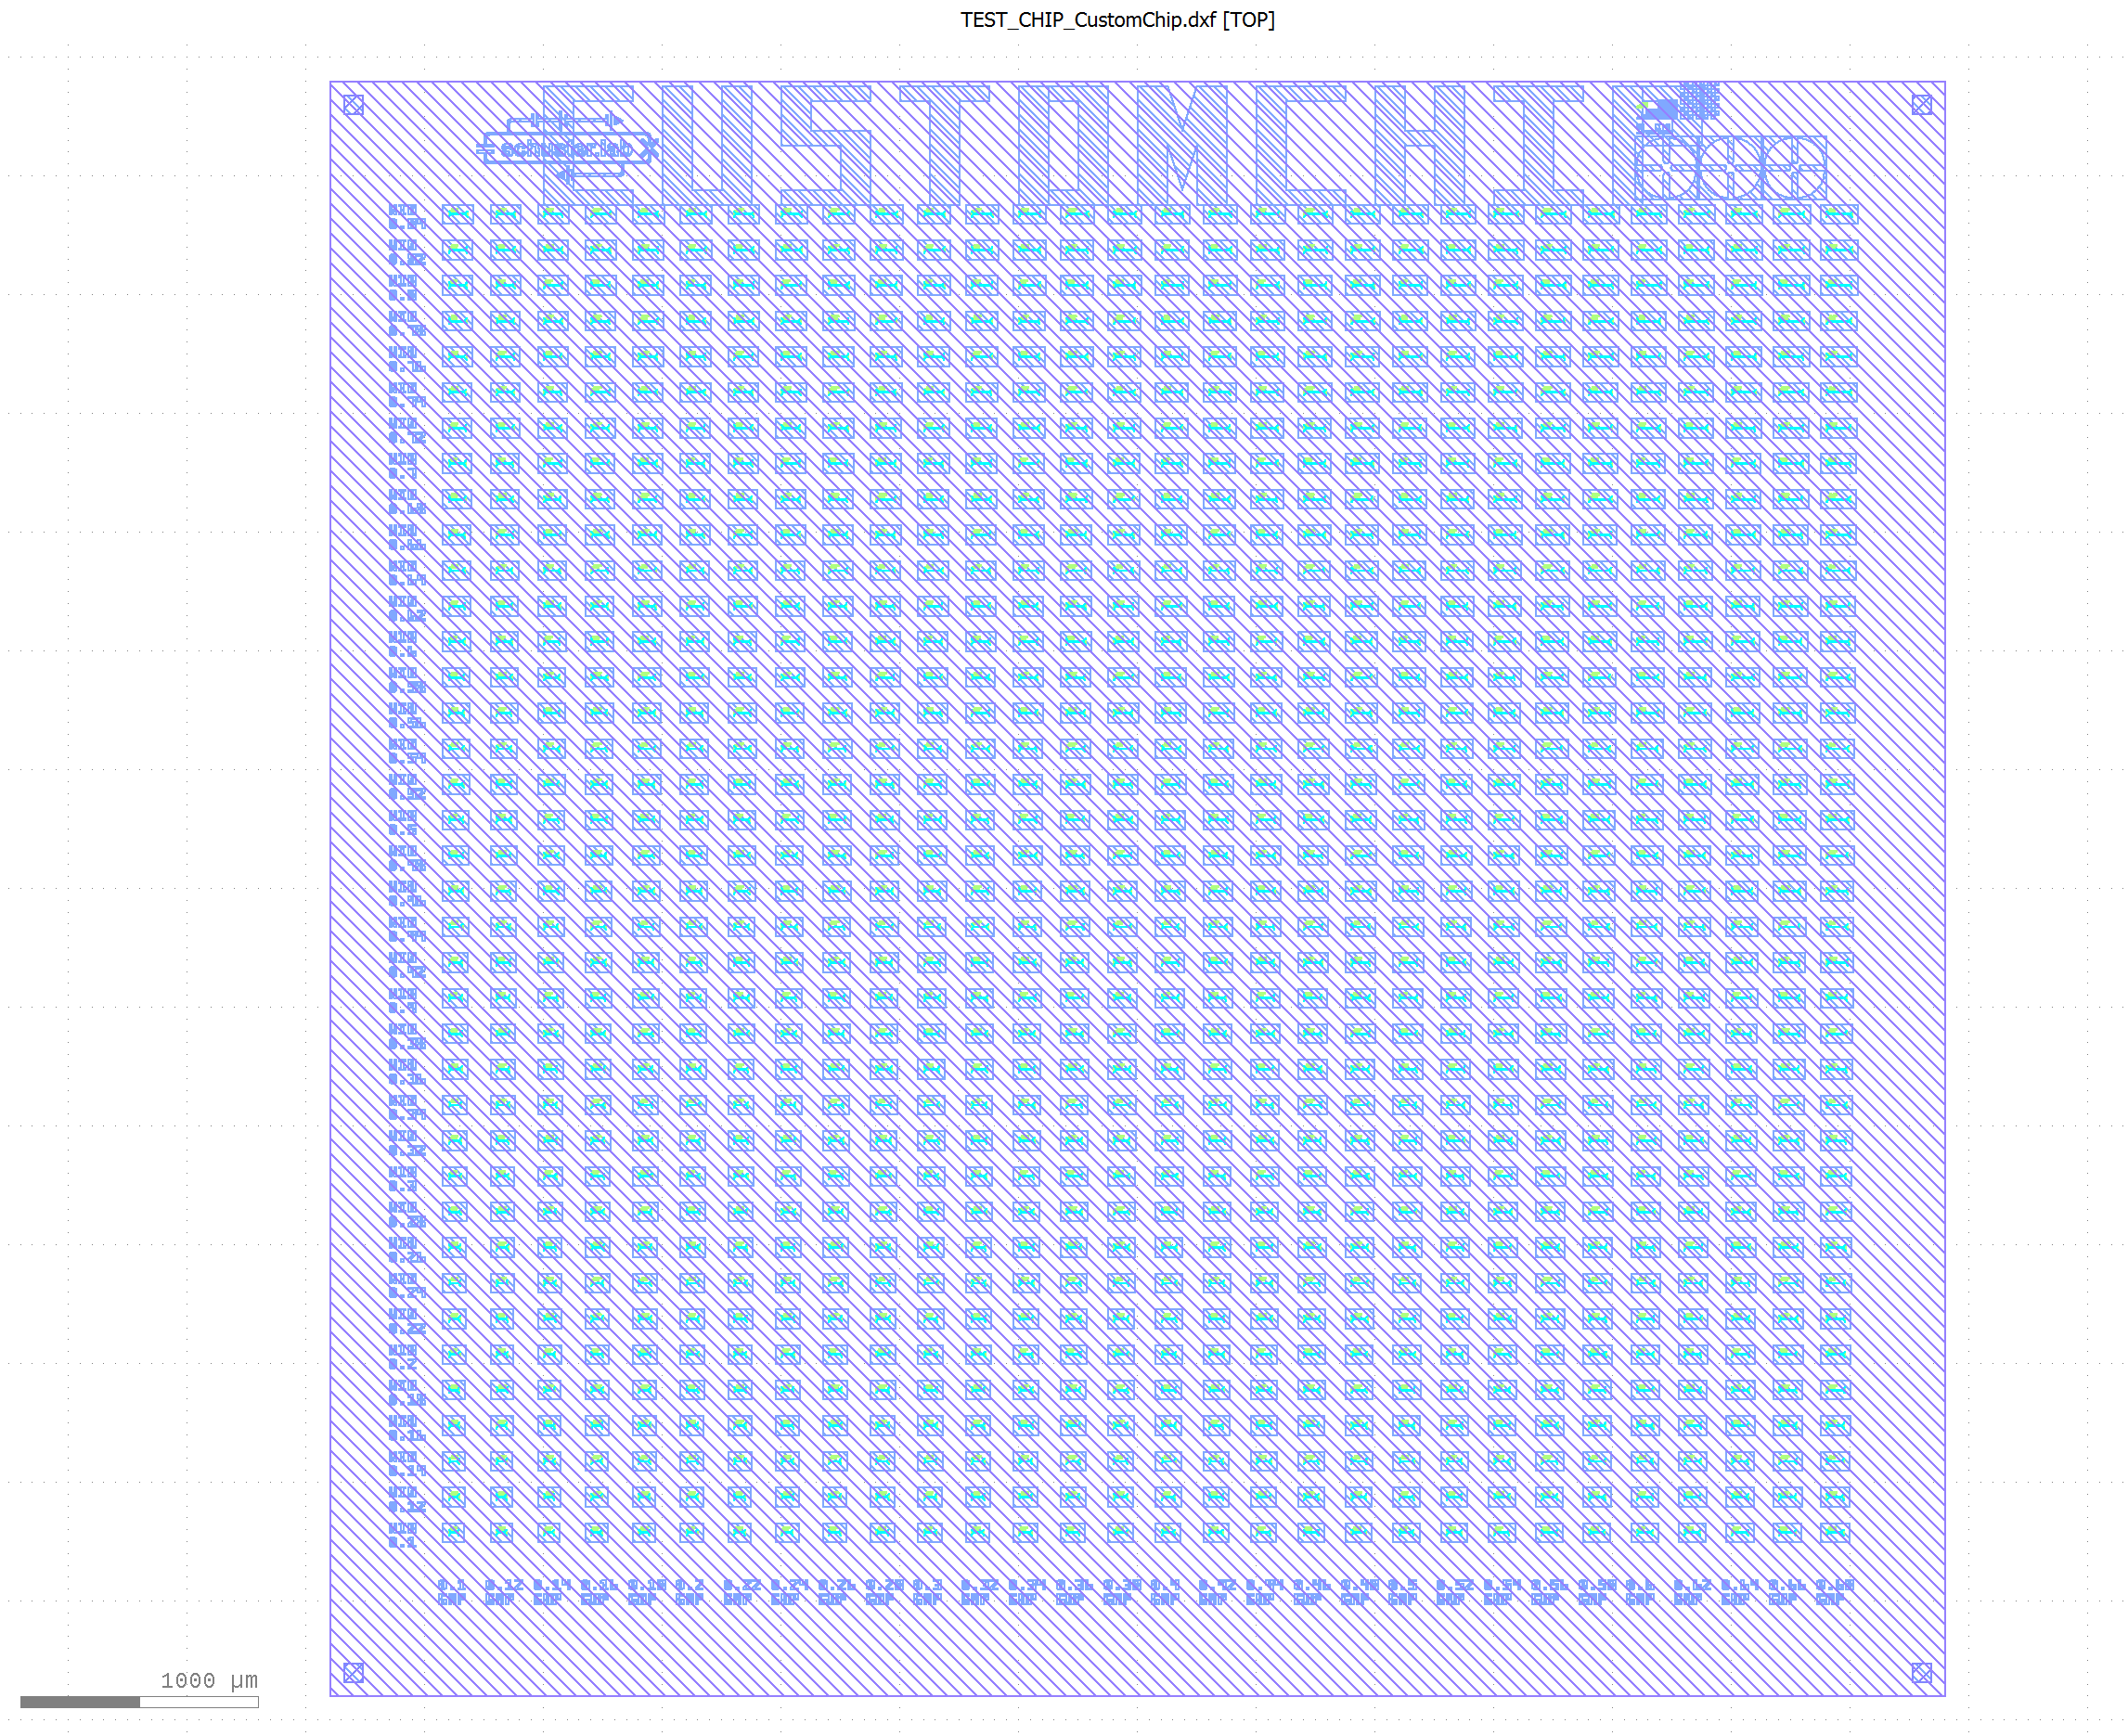

## Custom JJ

In [46]:
##########grid 1##########
##if want more grid per chip, copy paste the cell and adjust the variables

params = []

params.append({
    'M1_pads': False,   # Probe pads? No -> tigher packing
    # Choose the tested structure
    'test_JA': False,
    'test_smallJ': False,
    # Vary dose (hence separate layers) for Jlayer (each row) or Ulayer (each column)
    'dose_Jlayer_row': True,
    'dose_Ulayer_column': True,
    'ulayer_edge': False,  # Ulayer edge gap?
    'start_grid_x' : 500,
    'start_grid_y' : 690,
})

no_row = 12 # how many rows
no_column = 30 # how many columns

# Select the parameter being swept on x axis
x_swept = np.linspace(500, 2000, no_column)
doseJ = fl.grid_from_row(x_swept, no_row) 
x_key = 'dJ' # printed x label, <3 letters allowed
x_var = doseJ

# Select the parameter being swept on y axis
y_swept = np.linspace(100, 600, no_row)
doseU = fl.grid_from_column(y_swept, no_column, no_row)
y_key = 'dU' # printed y label, <3 letters allowed
y_var = doseU

grid = [no_column] * no_row

# The other params are fixed
ubridge_width = fl.grid_from_entry(0.3, no_row, no_column)

########### JA only ###########
window_width = fl.grid_from_entry(0.52, no_row, no_column)
# fixed at 0.52 (LL)

ja_length = fl.grid_from_entry(3.0, no_row, no_column)
# min 0.1 (0.15), max 6.0 (3.0) (LL)

gap_width = fl.grid_from_entry(0.14, no_row, no_column)
# fixed at 0.14 (LL)

no_gap=[50,] # = no_junctions / 2

########### Small J only ###########
j_length = fl.grid_from_entry(0.35, no_row, no_column)
# min 0.1 (0.15), max 6.0 (3.0) (LL)

params[0].update({
    'grid': grid,
    'x_var': x_var,
    'y_var': y_var,
    'x_key': x_key,
    'y_key': y_key,
    'ja_length': ja_length,
    'j_length': j_length,
    'gap_width': gap_width,
    'window_width': window_width,
    'ubridge_width': ubridge_width,
    'no_gap': no_gap,
    'no_column': no_column,
    'no_row': no_row,
    'pad_w': PAD_W,
    'pad_s': PAD_S,
    'pad_l': PAD_L,
    'cpw_s': CPW_S,
    'ptDensity': PTDENSITY,
    'doseJ': doseJ,
    'doseU': doseU,
    'lead_length': LEAD_LENGTH,
    'arb_struct': True,
    'arb_path': "FluxoniumWaferDXF/cCPT_JJ_only.dxf",
    'arb_ulayer': "L9D0",
    'arb_jlayer': "L8D0"
})

wafer = fl.Fluxonium4inWafer(waferID='TEST')
chip = fl.TestChip(wafer, "Jadyn", "5_M1", params=params)
chip.save(wafer, drawCopyDXF=True, dicingBorder=False, center=True)

Number of Chips: 120
Saved as: c:\Users\slab\OneDrive - Stanford\Documents\github\maskLib\example\TEST_CHIP_Jadyn.dxf


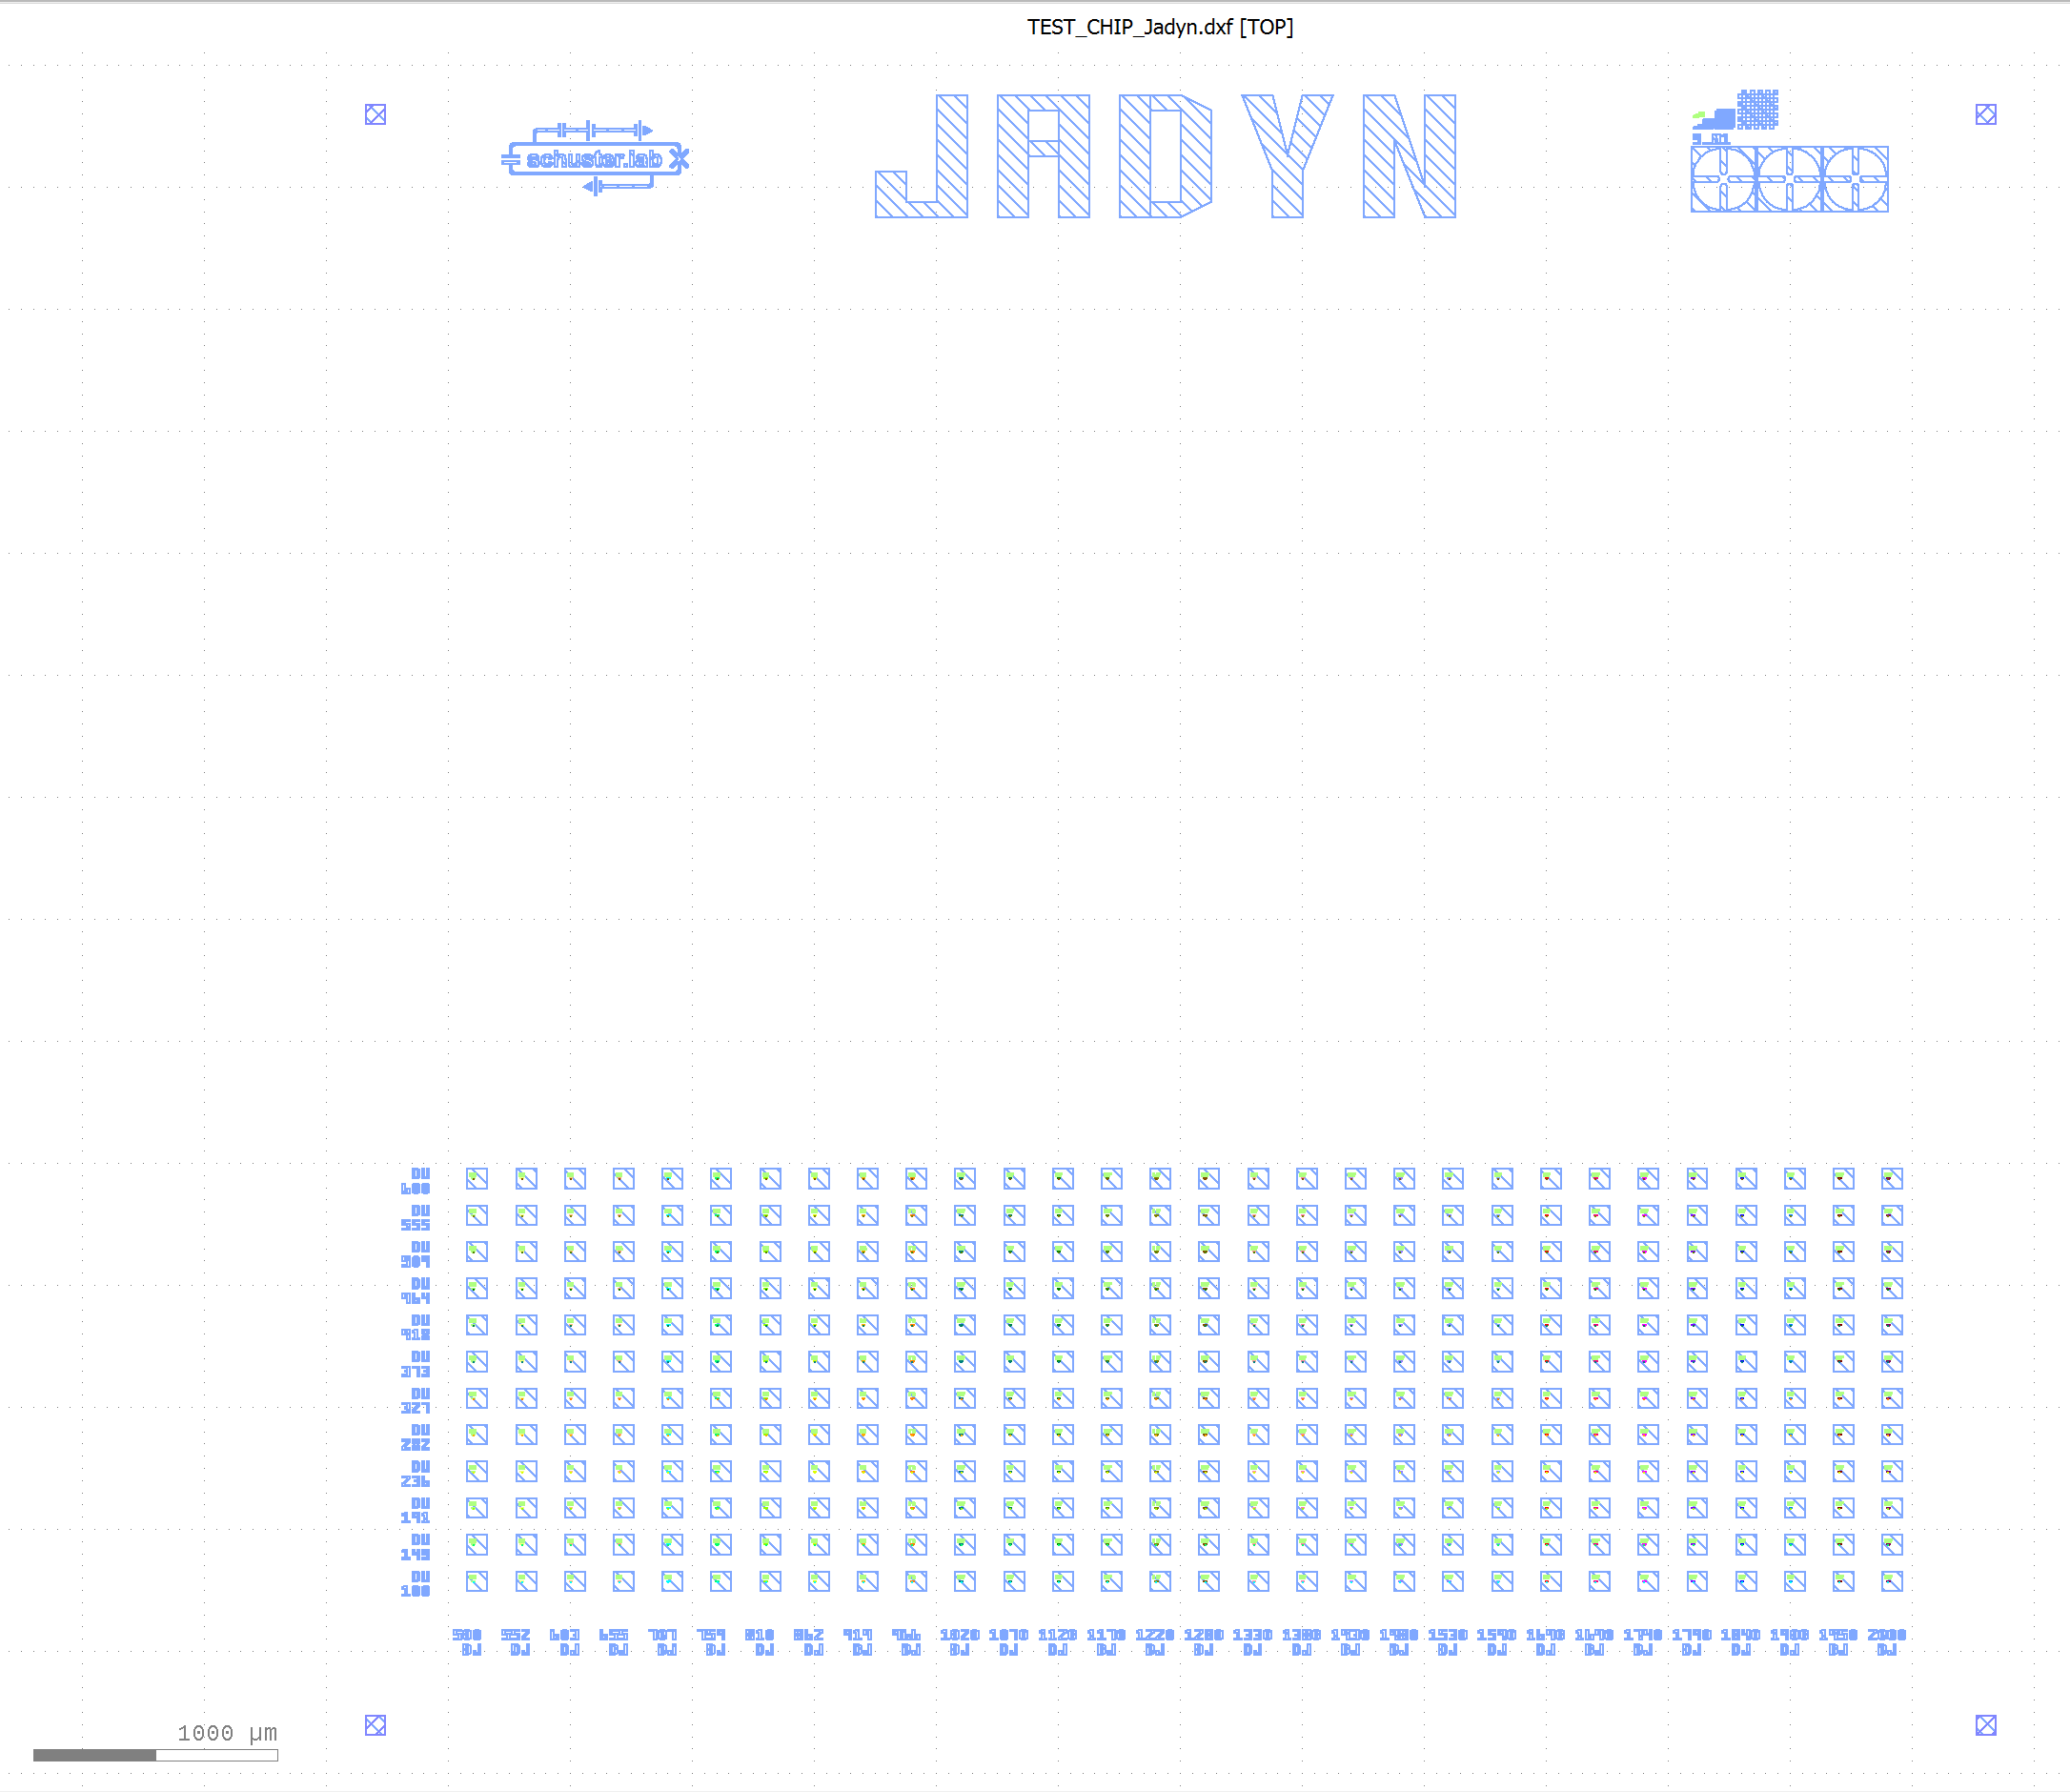